<a href="https://colab.research.google.com/github/ljbcoder/Emergence-of-Cooperation-Genetic-Algorithms/blob/main/Simulating-Cooperation-using-Genetic%20Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Goal of this project is to create an adversarial simulation using Genetic Algorithms. Agents will be competing with one another to collect resources

DNA: Constitutes behavioral patterns that emerge

In [ ]:
#Setting environment --> n(n-1)/2 different games played
#100 agents will be competing with eachother 1v1

#Each Bibble will fight each other to the death. The best Bibble will live and reproduce
#Let the Bibble games commence!


class Bibble:
  def __init__(self, dna, fitness, cooperation):
    #DNA will be a binary array containing the moves that the algorithm plays as most optimal --> 20 matches
    self.dna = dna
    #Fitness: Total score that the bot accumulates, will later be used to determine fitness and reproduction algorithm
    self.fitness = fitness
    #Evaluates how many times the bot cooperates with other bots (High: Altruistic/ Low: Selfish)
    self.cooperation = cooperation




# Prisoner's Dilemma:
Think about the case where rational agents only compete against each other once.
In this situation, the ideal solution would be to defect all the time. However,

Generation 0
_________________________


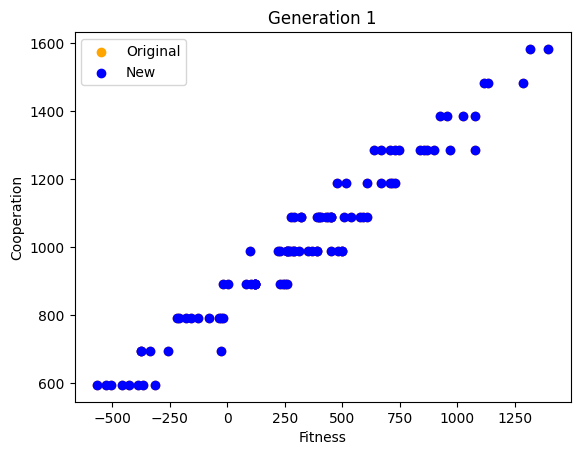

Generation 1
_________________________


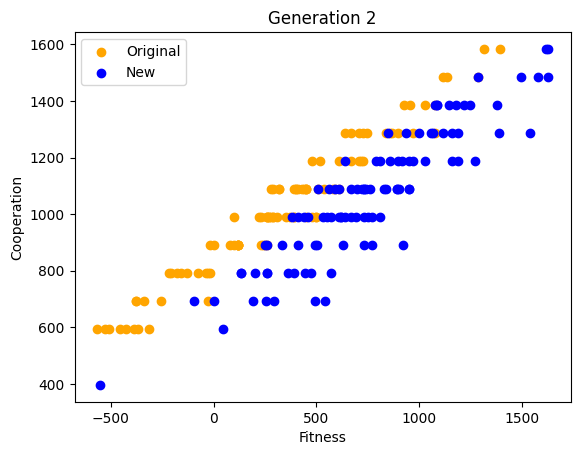

Generation 2
_________________________


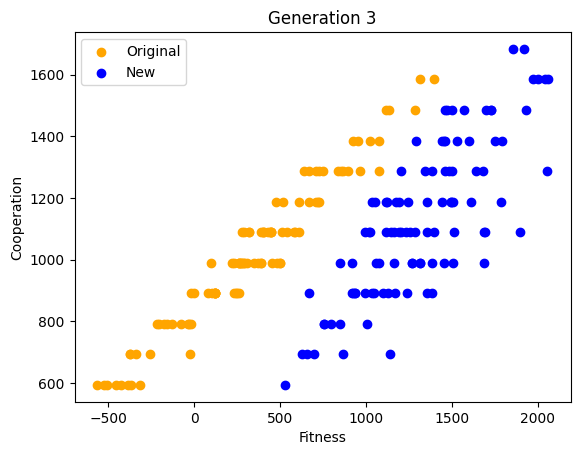

Generation 3
_________________________


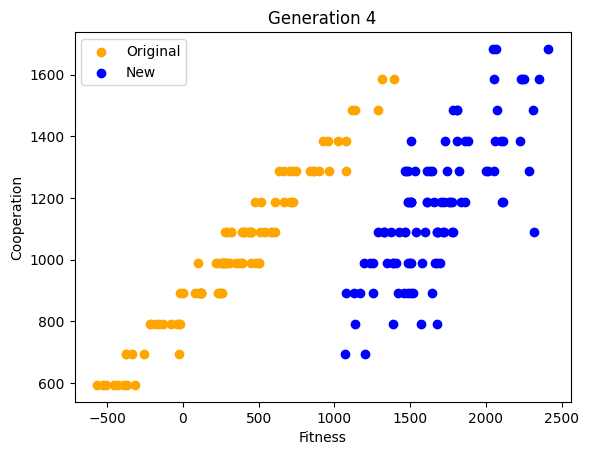

Generation 4
_________________________


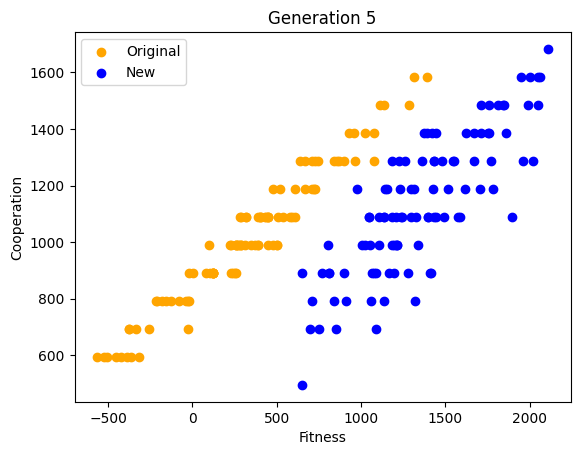

Generation 5
_________________________


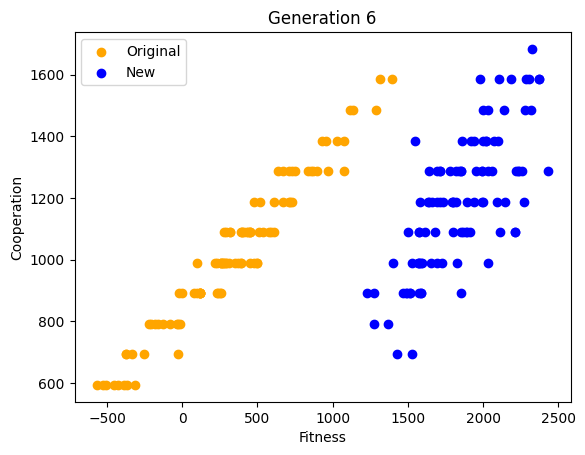

Generation 6
_________________________


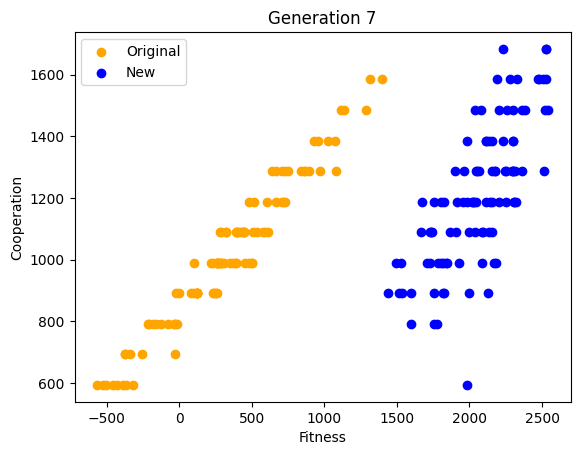

Generation 7
_________________________


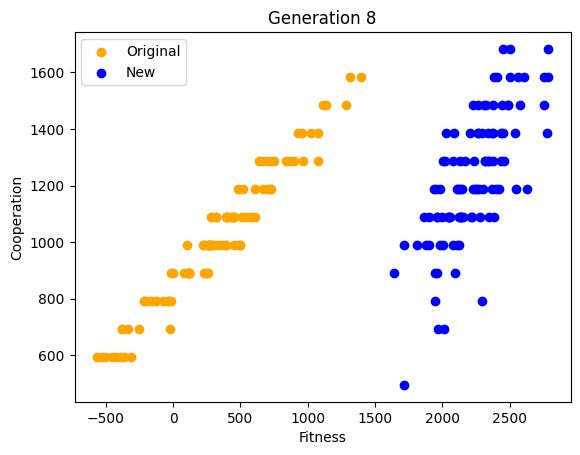

Generation 8
_________________________


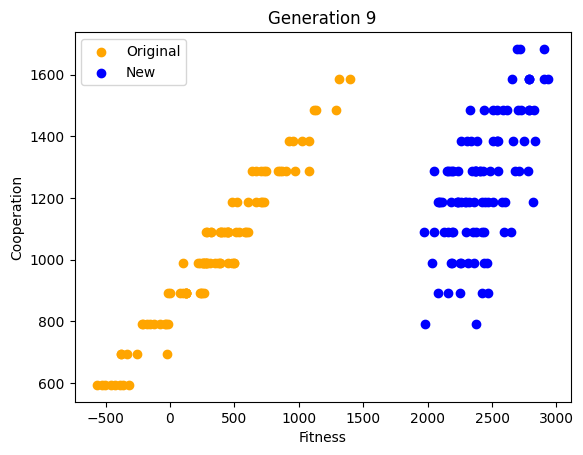

Generation 9
_________________________


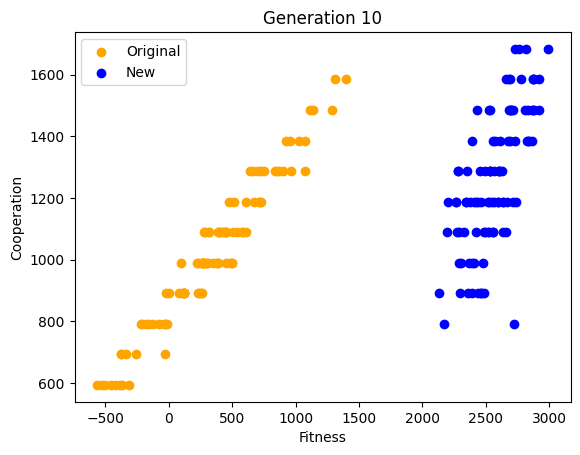

Generation 10
_________________________


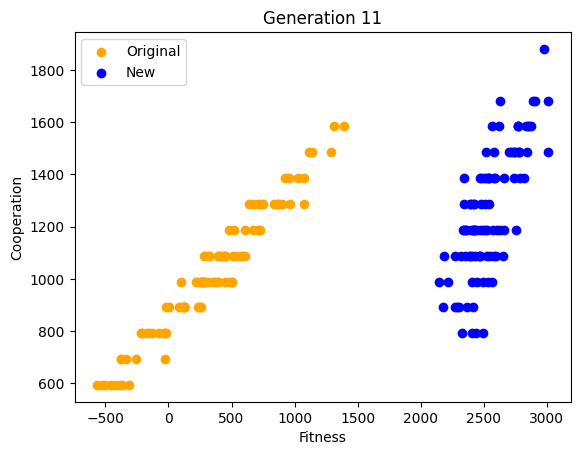

Generation 11
_________________________


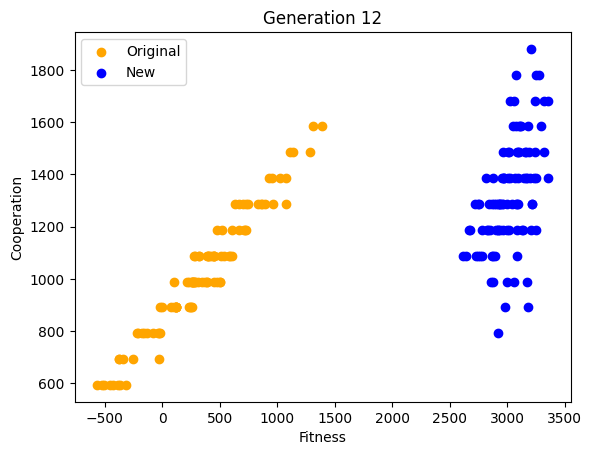

Generation 12
_________________________


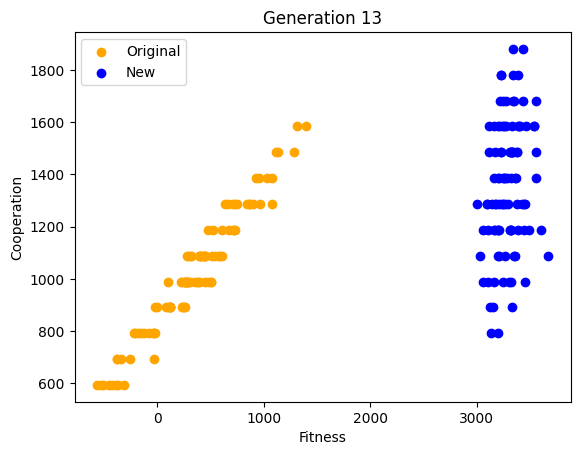

Generation 13
_________________________


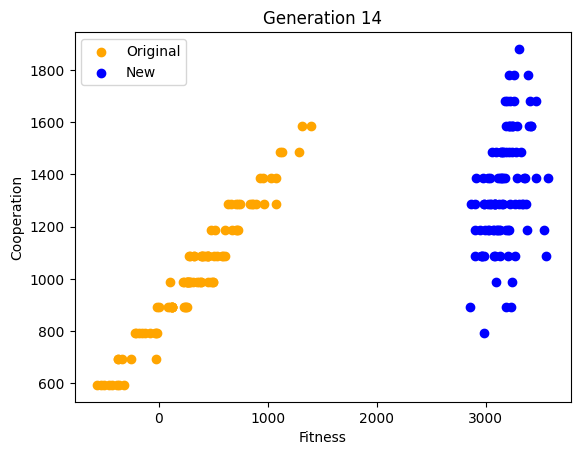

Generation 14
_________________________


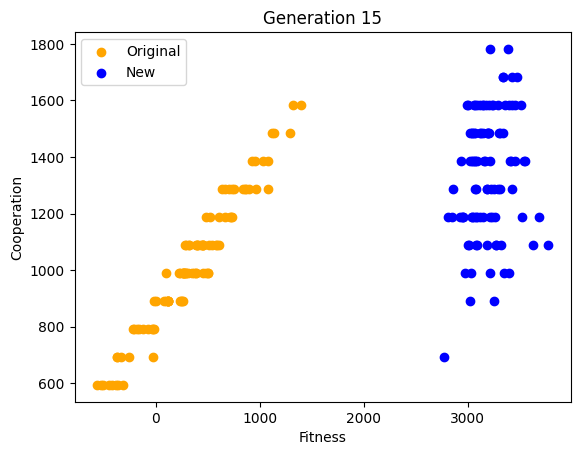

Generation 15
_________________________


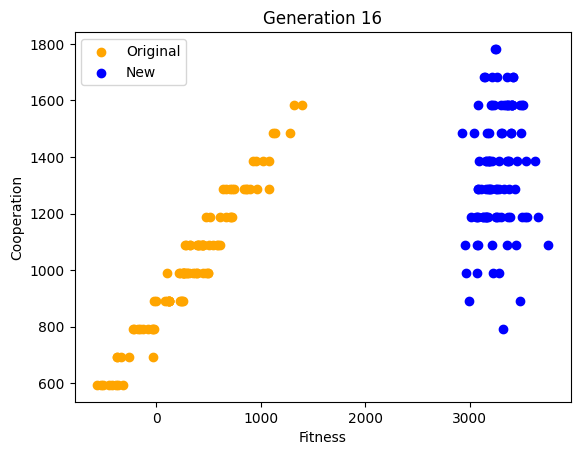

Generation 16
_________________________


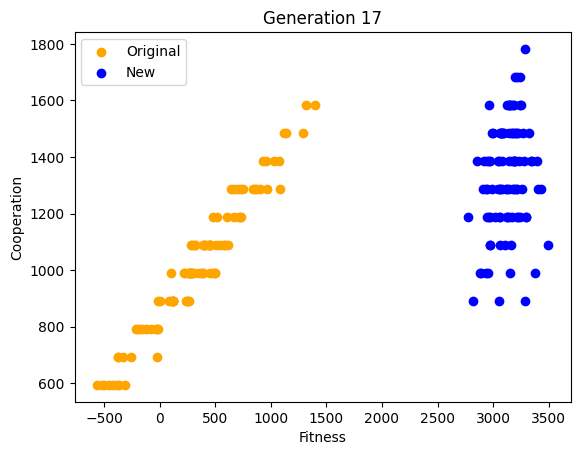

Generation 17
_________________________


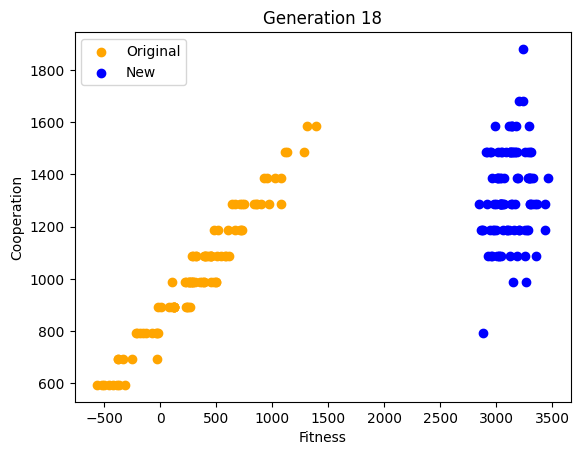

Generation 18
_________________________


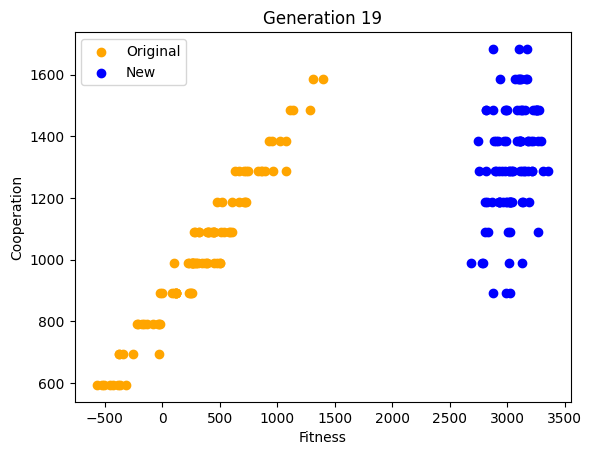

Generation 19
_________________________


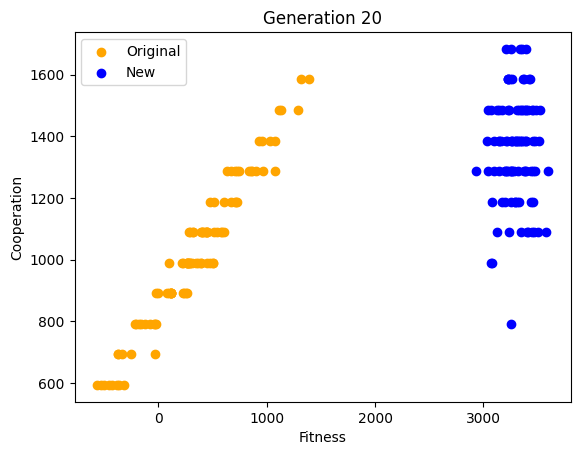

Generation 20
_________________________


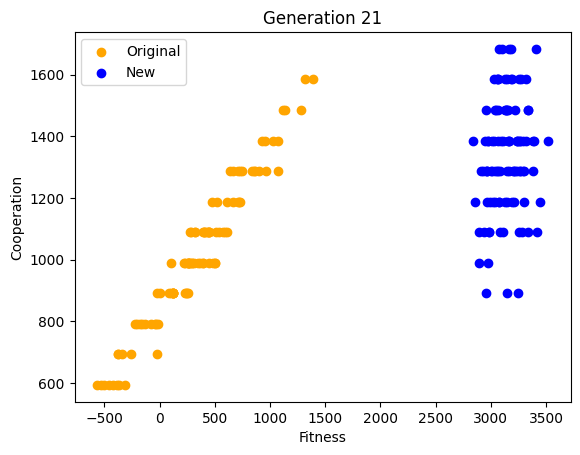

Generation 21
_________________________


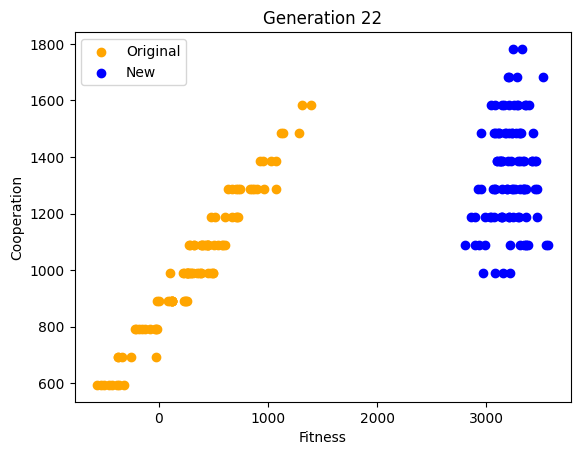

Generation 22
_________________________


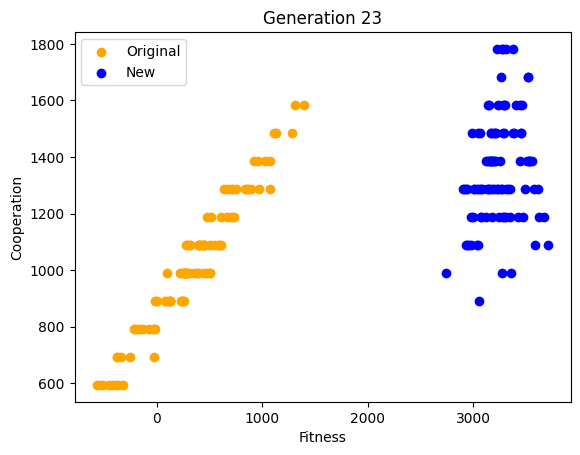

Generation 23
_________________________


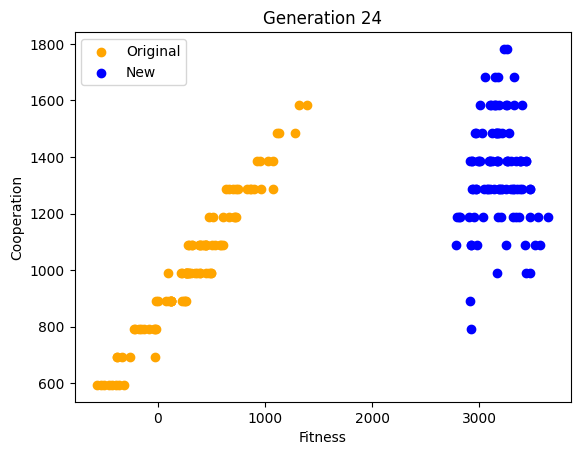

Generation 24
_________________________


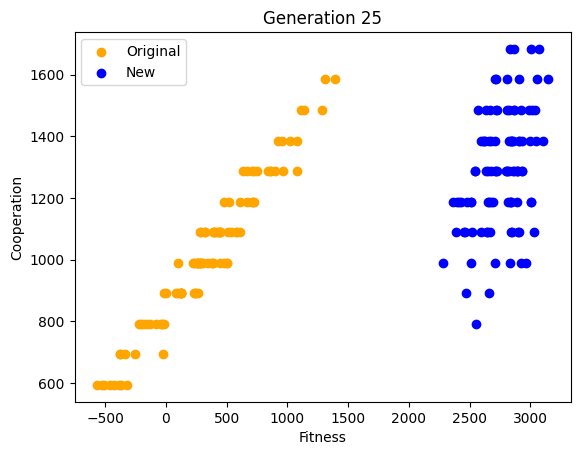






Final Generation
_________________________


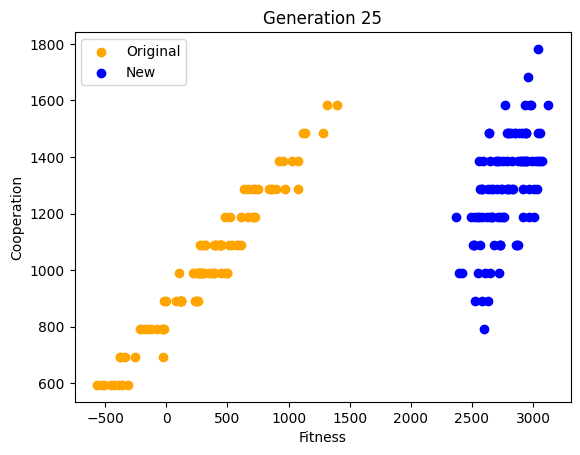

Total Cooperation Attempts 16 | Fitness:  3122
Bot 0 Algorithms:  [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]
___________________________-
Total Cooperation Attempts 14 | Fitness:  3074
Bot 1 Algorithms:  [1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1]
___________________________-
Total Cooperation Attempts 14 | Fitness:  3054
Bot 92 Algorithms:  [1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1]
___________________________-
Total Cooperation Attempts 15 | Fitness:  3053
Bot 34 Algorithms:  [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
___________________________-
Total Cooperation Attempts 14 | Fitness:  3044
Bot 97 Algorithms:  [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0]
___________________________-
Total Cooperation Attempts 15 | Fitness:  3043
Bot 7 Algorithms:  [1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
___________________________-
Total Cooperation Attempts 18 | Fitness:  3040
Bot 59 Algorit

In [ ]:
#Bibble Iteration #1: No memory of previous matches [Static Structure]

import random
import matplotlib.pyplot as plt

total_rounds = 20
total_generations = 25
population_size = 100

#Prisoner's Riddle Reward Modeling
# cooperate = (-1,-8)
# defect = (0,-3)

#Prisoner's Riddle --> Shifts back and forth
# cooperate = (3,-1)
# defect = (5,-3)

#Notice what happens when the risk is high for defecting
#This is why laws exist, if the reward is higher, but punishment will occur, agents choose cooperation
#Agents might defect occasionally in the hopes that the other might cooperate (e.g. Skipping the law)

cooperate = (3,-1)
defect = (6,-8)

#Nuclear War (Arms Race modeling)
# cooperate = (5,-20)
# defect = (3,-20)



class Bibble:
  def __init__(self, dna, fitness, cooperation):
    #DNA will be a binary array containing the moves that the algorithm plays as most optimal --> 20 matches
    self.dna = dna
    #Fitness: Total score that the bot accumulates, will later be used to determine fitness and reproduction algorithm
    self.fitness = fitness
    #Evaluates how many times the bot cooperates with other bots (High: Altruistic/ Low: Selfish)
    self.cooperation = cooperation

def compete(bot1,bot2):
  for i in range(len(bot1.dna)):

    cooperate_reward = []
    if bot1.dna[i] == 1 and bot2.dna[i] == 1:
      bot1.fitness += cooperate[0]
      bot2.fitness += cooperate[0]
      bot1.cooperation += 1
      bot2.cooperation += 1

    elif bot1.dna[i] == 1 and bot2.dna[i] == 0:
      #Risk Factor for cooperating
      bot1.fitness += cooperate[1]
      bot2.fitness += defect[0]
      bot1.cooperation += 1

    elif bot1.dna[i] == 0 and bot2.dna[i] == 1:
      bot1.fitness += defect[0]
      bot2.fitness += cooperate[1]
      bot2.cooperation += 1

    elif bot1.dna[i] == 0 and bot2.dna[i] == 0:
      bot1.fitness += defect[1]
      bot2.fitness += defect[1]

  return bot1, bot2


def random_dna():
  global total_rounds
  dna = []
  for i in range(total_rounds):
    dna.append(random.randint(0,1))
  return dna


def set_random_population(size):
  population = []
  for i in range(size):
    population.append(Bibble(random_dna(),0,0))
  return population

#Returns a random population of Bibbles
def population_war(population):
  for i in range(len(population)):
    for j in range(i+1,len(population)):
      compete(population[i],population[j])
  return population



def generation_results(population):
  global total_generations
  global original_fitness
  global original_cooperation

  rankings = dict()
  for i in range(len(population)):
    rankings[i] = (population[i].fitness, population[i].cooperation)

  rankings = dict(sorted(rankings.items(), key=lambda item: item[1], reverse=True))

  # for agent in rankings:
  #   print("Agent", agent, "| Fitness: ", rankings[agent][0], "| Cooperation: ",rankings[agent][1])

  fitness_val = []
  cooperation_val = []

  for i in rankings:
    fitness_val.append(rankings[i][0])
    cooperation_val.append(rankings[i][1])


  plt.title("Generation " + str(generation+1))
  plt.xlabel("Fitness")
  plt.ylabel("Cooperation")
  plt.scatter(original_fitness, original_cooperation, color='orange', label='Original')
  # Current population (blue)
  plt.scatter(fitness_val, cooperation_val, color='blue', label='New')
  plt.legend()
  plt.show()
  return rankings


def select_top_10(rankings, population):
  global population_size
  top_10 = []
  #top 10 percent are left
  for i in range(int(population_size*0.1)):
    bibble = population[list(rankings.keys())[i]]
    bibble.fitness = 0
    bibble.cooperation = 0
    top_10.append(bibble)
  return top_10


def reproduce(bot1, bot2):
  global total_rounds
  child_dna = []
  for i in range(total_rounds):
    choice = random.randint(0,1)
    if choice == 0:
      child_dna.append(bot1.dna[i])
    else:
      child_dna.append(bot2.dna[i])

  child = Bibble(child_dna,0,0)
  return child

def mating_season(rankings,population):
  global population_size
  #Generate list of possibiities:
  new_gen = []
  new_gen += select_top_10(rankings, population)

  bibble_rankings= list(rankings.keys())

  reproduction_list = []
  for i in range(1,population_size + 1):
    reproduction_list += [i] * (100-i+1)
  random.shuffle(reproduction_list)

  for i in range(int(population_size*0.9)):
    bibble1 = bibble_rankings[random.randint(0,len(bibble_rankings)-1)]
    bibble2 = bibble_rankings[random.randint(0,len(bibble_rankings)-1)]
    new_gen.append(reproduce(population[bibble1],population[bibble2]))

  return new_gen


#Code for Generation Iterations
population = set_random_population(100)

for generation in range(total_generations):
  print("Generation", generation)
  print("_________________________")
  population = population_war(population)

  if generation == 0:
    original_fitness = [agent.fitness for agent in population]
    original_cooperation = [agent.cooperation for agent in population]

  rankings = generation_results(population)
  new_gen = mating_season(rankings,population)
  population = new_gen

print("\n\n\n\n")

print("Final Generation")
print("_________________________")
population = population_war(population)
rankings = generation_results(population)

for i in rankings:
  print("Total Cooperation Attempts", sum(population[i].dna), "| Fitness: ", population[i].fitness)
  print("Bot", i , "Algorithms: ",population[i].dna)
  print("___________________________-")








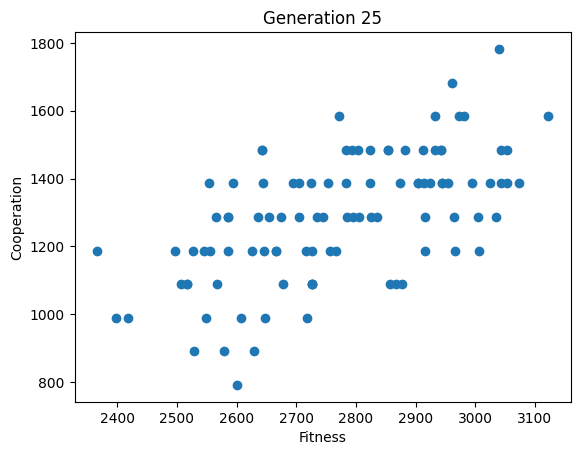

In [ ]:
import matplotlib.pyplot as plt


fitness_val = []
cooperation_val = []

for i in rankings:
  fitness_val.append(rankings[i][0])
  cooperation_val.append(rankings[i][1])
plt.title("Generation " + str(generation+1))
plt.xlabel("Fitness")
plt.ylabel("Cooperation")
plt.scatter(fitness_val,cooperation_val)

In [ ]:
test1 = Bibble([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],0,0)
test2 = Bibble([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],0,0)

def compete(bot1,bot2):
  for i in range(len(bot1.dna)):
    if bot1.dna[i] == 1 and bot2.dna[i] == 1:
      bot1.fitness += 3
      bot2.fitness += 3
      bot1.cooperation += 1
      bot2.cooperation += 1

    elif bot1.dna[i] == 1 and bot2.dna[i] == 0:
      bot1.fitness -= 1
      bot2.fitness += 5
      bot1.cooperation += 1

    elif bot1.dna[i] == 0 and bot2.dna[i] == 1:
      bot1.fitness += 5
      bot2.fitness += -1
      bot2.cooperation += 1

    elif bot1.dna[i] == 0 and bot2.dna[i] == 0:
      bot1.fitness -= 3
      bot2.fitness -= 3

    print(bot1.cooperation, bot2.cooperation)
  return bot1, bot2

compete(test1,test2)
print(test1.fitness)
print(test2.fitness)



0 0
0 1
1 2
2 3
3 4
3 5
3 6
3 7
3 7
3 8
3 9
3 10
3 11
3 12
3 13
4 14
4 15
4 16
4 17
4 18
76
-8


In [ ]:
#Bibble Iteration #2
#Bibbles will now act accordingly to previous rounds: Adding Trust between Bibbles into the equation

import random

#DNA Structure:
#Initial State/  Reaction when defected/Iterations  /  Reaction when Cooperated/iterations  / T

def random_dna():
  dna = []
  for i in range(20):
    dna.append(random.randint(0,1))
  return dna


def compete(bot1,bot2):
  for i in range(len(bot1.dna)):
    if bot1.dna[i] == 1 and bot2.dna[i] == 1:
      bot1.fitness += 3
      bot2.fitness += 3
      bot1.cooperation += 1
      bot2.cooperation += 1

    elif bot1.dna[i] == 1 and bot2.dna[i] == 0:
      bot1.fitness -= 1
      bot2.fitness += 5
      bot1.cooperation += 1

    elif bot1.dna[i] == 0 and bot2.dna[i] == 1:
      bot1.fitness -= 1
      bot2.fitness += 5
      bot2.cooperation += 1

    elif bot1.dna[i] == 0 and bot2.dna[i] == 0:
      bot1.fitness -= 3
      bot2.fitness -= 3

  return bot1, bot2


def random_dna():
  dna = []
  for i in range(20):
    dna.append(random.randint(0,1))
  return dna


def set_random_population(size):
  population = []
  for i in range(size):
    population.append(Bibble(random_dna(),0,0))
  return population

#Returns a random population of Bibbles
def population_war(population):
  for i in range(len(population)):
    for j in range(i+1,len(population)):
      compete(population[i],population[j])
  return population



def generation_results(population):
  rankings = dict()
  for i in range(len(population)):
    rankings[i] = (population[i].fitness, population[i].cooperation)

  rankings = dict(sorted(rankings.items(), key=lambda item: item[1], reverse=True))
  for agent in rankings:
    print("Agent", agent, "| Fitness: ", rankings[agent][0], "| Cooperation: ",rankings[agent][1])

  return rankings


def select_top_10(rankings, population):
  top_10 = []
  for i in range(10):
    bibble = population[list(rankings.keys())[i]]
    bibble.fitness = 0
    bibble.cooperation = 0
    top_10.append(bibble)
  return top_10


def reproduce(bot1, bot2):
  child_dna = []
  for i in range(20):
    choice = random.randint(0,1)
    if choice == 0:
      child_dna.append(bot1.dna[i])
    else:
      child_dna.append(bot2.dna[i])

  child = Bibble(child_dna,0,0)
  return child

def freaky_time(rankings,population):
  #Generate list of possibiities:
  new_gen = []
  new_gen += select_top_10(rankings, population)

  bibble_rankings= list(rankings.keys())

  reproduction_list = []
  for i in range(1,101):
    reproduction_list += [i] * (100-i+1)
  random.shuffle(reproduction_list)

  for i in range(90):
    bibble1 = bibble_rankings[random.randint(0,len(bibble_rankings)-1)]
    bibble2 = bibble_rankings[random.randint(0,len(bibble_rankings)-1)]
    new_gen.append(reproduce(population[bibble1],population[bibble2]))

  return new_gen


#Code for Generation Iterations
population = set_random_population(100)

for generation in range(5):
  print("Generation", generation)
  print("_________________________")
  population_war(population)
  rankings = generation_results(population)
  new_gen = freaky_time(rankings,population)
  population = new_gen

print("\n\n\n\n")

print("Final Generation")
print("_________________________")
population_war(population)
rankings = generation_results(population)

for i in rankings:
  print("Total Cooperation Attempts", len(population[i].dna) - sum(population[i].dna), "| Fitness: ", population[i].fitness)
  print("Bot", i , "Algorithms: ",population[i].dna)
  print("___________________________-")








Generation 0
_________________________
Agent 84 | Fitness:  5796 | Cooperation:  1584
Agent 94 | Fitness:  5636 | Cooperation:  1287
Agent 91 | Fitness:  5560 | Cooperation:  1386
Agent 86 | Fitness:  5428 | Cooperation:  1386
Agent 98 | Fitness:  5266 | Cooperation:  1089
Agent 99 | Fitness:  5210 | Cooperation:  990
Agent 90 | Fitness:  4768 | Cooperation:  1089
Agent 80 | Fitness:  4720 | Cooperation:  1287
Agent 88 | Fitness:  4692 | Cooperation:  1089
Agent 83 | Fitness:  4542 | Cooperation:  1188
Agent 95 | Fitness:  4510 | Cooperation:  891
Agent 82 | Fitness:  4472 | Cooperation:  1089
Agent 78 | Fitness:  4384 | Cooperation:  1188
Agent 79 | Fitness:  4366 | Cooperation:  1188
Agent 97 | Fitness:  4246 | Cooperation:  792
Agent 93 | Fitness:  4176 | Cooperation:  891
Agent 76 | Fitness:  4152 | Cooperation:  1188
Agent 74 | Fitness:  4120 | Cooperation:  1188
Agent 89 | Fitness:  4116 | Cooperation:  891
Agent 73 | Fitness:  4068 | Cooperation:  1188
Agent 71 | Fitness:  3990 

# **ITERATION 2**

In [ ]:

import random
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import concurrent.futures

class Bibble:
  def __init__(self, dna, fitness, cooperation, trustworthy):
    self.dna = dna
    #Fitness: Total score that the bot accumulates, will later be used to determine fitness and reproduction algorithm
    self.fitness = fitness
    #Evaluates how many times the bot decides to cooperate with other bots (High: Altruistic/ Low: Selfish)
    self.cooperation = cooperation

    #Evaluates how many (W/W situations) the bot is in
    self.trustworthy = trustworthy





#How does the DNA work?
#Each metric is put into a list
# Initial/ Forgiveness / Apologetic / Retaliatory/ Belief/ Grudge/
#Initial: Start as Defect --> 0/ Cooperate --> 1
#Agreeable: (0-1) Probability to cooperate after (W/W) [Belief included] (0: Nice, 100: Nasty)
#Forgiveness: (0-1) Probability to cooperate after betrayals(L/W) [Grudge and Belief included] (0:Always Retaliate, 100: Always Forgive)
#Apologetic: (0-1) Probability to cooperate after betraying (W/L) [Grudge and Belief Included] (0:Never Apologize, 100: Always Apologize)
#Easygoing: (0-1) Probability to cooperate after (L/L)

#Belief: (0-whole_game) How many previous matches to believe the other partner for
#Grudge: (0-whole_game) How long to hold grudges
#Clear: (0-1) How much emphasis do you put on near events  (0: All equal(overthinker) / 100: All on events right before)


  # def move(self,my_moves,opp_moves):
  #   global total_rounds

  #   #Initial Move
  #   if my_moves == []:
  #     return self.dna[0]

  #   forgiveness = self.dna[1]
  #   apologetic = self.dna[2]
  #   belief = self.dna[3]
  #   grudge = self.dna[4]
  #   clear = self.dna[5]


  #   forgive_memory = []
  #   score =
  #   #(L/L)
  #   if my_moves[-1] == 0 and opp_moves[-1] == 0:
  #     score = adamant
  #   #(L/W)
  #   elif my_moves[-1] == 1 and opp_moves[-1] == 0:

  #   #(W/L)
  #   elif my_moves[-1] == 0 and my_moves[-1] == 1:

  #   #(W/W)
  #   elif opp_moves[-1] == 1 and my_moves[-1] == 1:



  #   return moves

def geometric_mean(x):
    return np.prod(x) ** (1 / len(x))


def impression_function(c,x):
  return 1-(math.tanh(math.pi*c*(1-x)))


def precompute_weights(c, t):
    weights = [int(100 * impression_function(c, i / t)) for i in range(t * 10)]
    return weights

def impression(c, moves, precomputed_weights):
    t = len(moves)
    score = sum(precomputed_weights[i] * moves[i // 10] for i in range(t * 10))
    cooperation_count = score
    impression_score = score / sum(precomputed_weights)
    return impression_score



def move(bot,my_moves,opp_moves):

  if my_moves == []:
    return bot.dna[0]


  agreeable = bot.dna[1]
  forgiving = bot.dna[2]
  apologetic = bot.dna[3]
  easy_going = bot.dna[4]
  immediate = bot.dna[5]

  weights =precompute_weights(immediate, len(opp_moves))
  impression_score = impression(immediate,opp_moves,weights)
  my_impression_score = impression(immediate,my_moves,weights)


  #print("Impression Score ",impression_score)
  #print("My Impression Score",my_impression_score)

  #Agreeable:
  agreeable_score = geometric_mean([impression_score,agreeable])
  #print("Agreeable:",agreeable_score)

  #Forgiving
  forgiving_score = geometric_mean([impression_score,forgiving])
  #print("Forgiving:",forgiving_score)


  #Apologetic
  apologetic_score = geometric_mean([my_impression_score,apologetic])
  #print("Apologetic:",apologetic_score)

  #Easy Going
  #Introduce bias term to remove division by zero
  impression_diff = math.tanh((my_impression_score+0.1) * (impression_score+0.1) / ((my_impression_score+0.1)**2))
  easy_going_score = geometric_mean([impression_diff,easy_going])
  #print("Easy-Going:",easy_going_score)

  #Give more weight to metrics depending on case
  if impression_score >= 0.5:
    final_score = int((impression_score + 2*agreeable_score + 2*forgiving_score + apologetic_score + easy_going_score)/7 * 1000)

  else:
    final_score = int((impression_score + agreeable_score + forgiving_score + 2*apologetic_score + 2*easy_going_score)/7 * 1000)

  return random.choices([0, 1], weights=[1-final_score, final_score])[0]
  # probabilities = [1] * final_score + [0] * (1000-final_score)
  # random.shuffle(probabilities)
  # return probabilities[random.randint(0,999)]







def random_dna():
  global total_rounds
  dna = []
  #Initial
  dna.append(random.randint(0,1))
  #Agreeable
  dna.append(random.uniform(0, 1))
  #Forgiveness
  dna.append(random.uniform(0, 1))
  #Apologetic
  dna.append(random.uniform(0, 1))
  #Easy Going
  dna.append(random.uniform(0, 1))
  #Clear/Memory
  dna.append(random.uniform(0, 1))

  return dna




def compete(bot1,bot2):
  global cooperate, defect
  bot1_moves = []
  bot2_moves = []


  for i in range(total_rounds):
    move_1 = move(bot1, bot1_moves,bot2_moves)
    move_2 = move(bot2, bot2_moves,bot1_moves)
    if move_1 == 1 and move_2 == 1:
      bot1.fitness += cooperate[0]
      bot2.fitness += cooperate[0]
      bot1.cooperation += 1
      bot2.cooperation += 1
      bot1.trustworthy += 1
      bot2.trustworthy += 1

    elif move_1 == 1 and move_2 == 0:
      #Risk Factor for cooperating
      bot1.fitness += cooperate[1]
      bot2.fitness += defect[0]
      bot1.cooperation += 1

    elif move_1== 0 and move_2 == 1:
      bot1.fitness += defect[0]
      bot2.fitness += cooperate[1]
      bot2.cooperation += 1

    elif move_1 == 0 and move_2 == 0:
      bot1.fitness += defect[1]
      bot2.fitness += defect[1]

    bot1_moves.append(move_1)
    bot2_moves.append(move_2)

  return bot1, bot2






def set_random_population(size):
  population = []
  for i in range(size):
    population.append(Bibble(random_dna(),0,0,0))
  return population


def population_war(population):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = [executor.submit(compete, population[i], population[j])
                   for i in range(len(population)) for j in range(i+1, len(population))]
    return [result.result() for result in results]




def generation_results(population,):
  global total_generations
  global original_fitness
  global original_cooperation

  rankings = dict()
  for i in range(len(population)):
    rankings[i] = (population[i].fitness, population[i].cooperation)

  rankings = dict(sorted(rankings.items(), key=lambda item: item[1], reverse=True))

  # for agent in rankings:
  #   print("Agent", agent, "| Fitness: ", rankings[agent][0], "| Cooperation: ",rankings[agent][1])

  fitness_val = []
  cooperation_val = []

  for i in rankings:
    fitness_val.append(rankings[i][0])
    cooperation_val.append(rankings[i][1])


  plt.title("Generation " + str(generation+1))
  plt.xlabel("Fitness")
  plt.ylabel("Cooperation")
  plt.scatter(original_fitness,original_cooperation)
  plt.scatter(fitness_val,cooperation_val)
  plt.show()
  return rankings


def select_top_10(rankings, population):
  global population_size
  top_10 = []
  #top 10 percent are left
  for i in range(int(population_size*0.1)):
    bibble = population[list(rankings.keys())[i]]
    bibble.fitness = 0
    bibble.cooperation = 0
    top_10.append(bibble)
  return top_10


def reproduce(bot1, bot2):
  global total_rounds
  child_dna = []
  if bot1.dna[0] == bot2.dna[0]:
    child_dna.append(bot1.dna[0])
  else:
    child_dna.append(random.randint(0,1))

  for i in range(1,len(bot1.dna)):
    child_dna.append((bot1.dna[i] + bot2.dna[i])/2)

  child = Bibble(child_dna,0,0,0)
  return child

def freaky_time(rankings,population):
  global population_size
  #Generate list of possibiities:
  new_gen = []
  new_gen += select_top_10(rankings, population)

  bibble_rankings= list(rankings.keys())

  reproduction_list = []
  for i in range(1,population_size + 1):
    reproduction_list += [i] * (100-i+1)
  random.shuffle(reproduction_list)

  for i in range(int(population_size*0.9)):
    bibble1 = bibble_rankings[random.randint(0,len(bibble_rankings)-1)]
    bibble2 = bibble_rankings[random.randint(0,len(bibble_rankings)-1)]
    new_gen.append(reproduce(population[bibble1],population[bibble2]))

  return new_gen




total_rounds = 20
total_generations = 15
population_size = 10


cooperate = (3,0)
defect = (5,1)



#Code for Generation Iterations
population = set_random_population(100)

for generation in range(total_generations):
  print("Generation", generation)
  print("_________________________")

  population = population_war(population)
  print(population[1].fitness)
  if generation == 0:
    original_fitness = [agent.fitness for agent in population]
    original_cooperation = [agent.cooperation for agent in population]

  rankings = generation_results(population)
  new_gen = freaky_time(rankings,population)
  population = new_gen

print("\n\n\n\n")

print("Final Generation")
print("_________________________")
population = population_war(population)
rankings = generation_results(population)

for i in rankings:
  print("Total Cooperation Attempts", sum(population[i].dna), "| Fitness: ", population[i].trustworthy)
  print("Bot", i , "Algorithms: ",population[i].dna)
  print("___________________________-")


Generation 0
_________________________


AttributeError: 'tuple' object has no attribute 'fitness'

Need to reduce time/space complexity --. Every iteration requires an array.length = total_matches
[0,1/2]
[0,1/3,2/3]
[0,1/4,2/4,3/4]

Each match is O(n^2)

Generation 0
_________________________
100


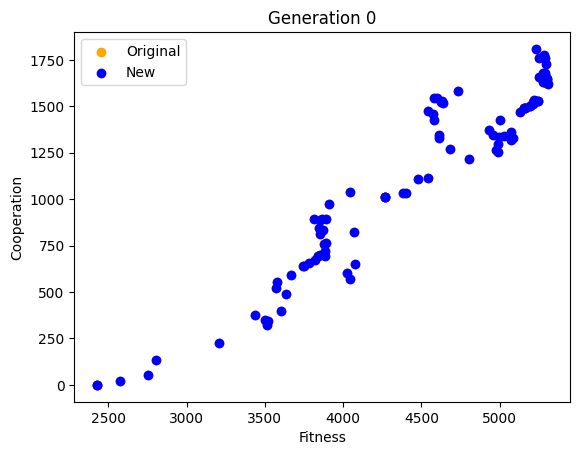

Generation 1
_________________________
100


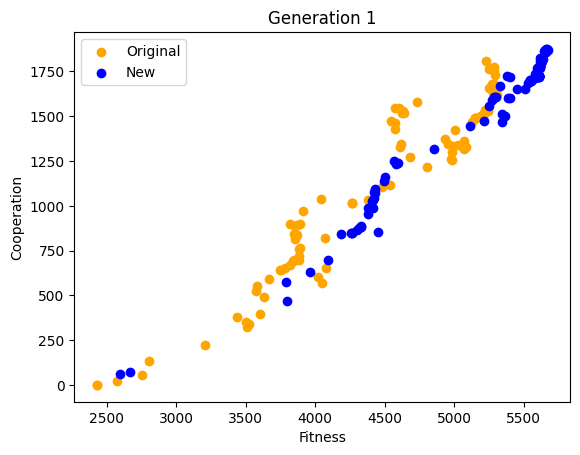

Generation 2
_________________________
100


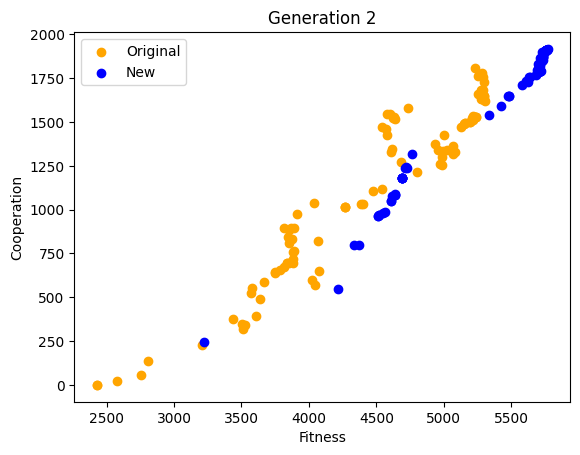

Generation 3
_________________________
100


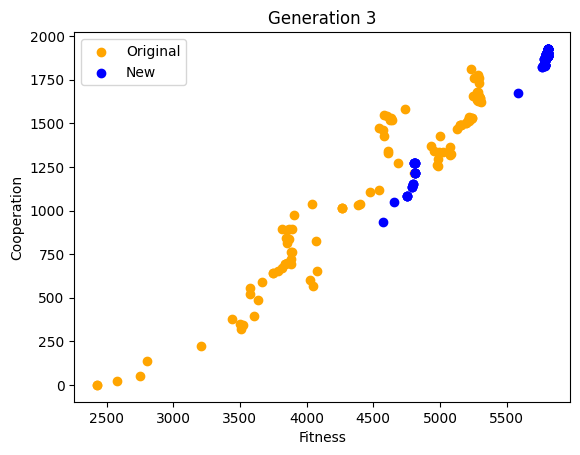

Generation 4
_________________________
100


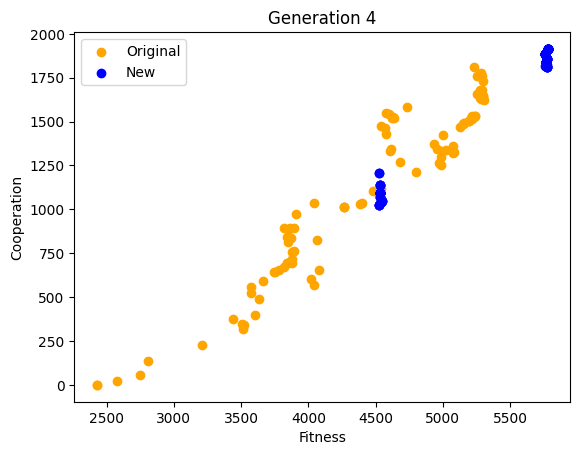

Generation 5
_________________________
100


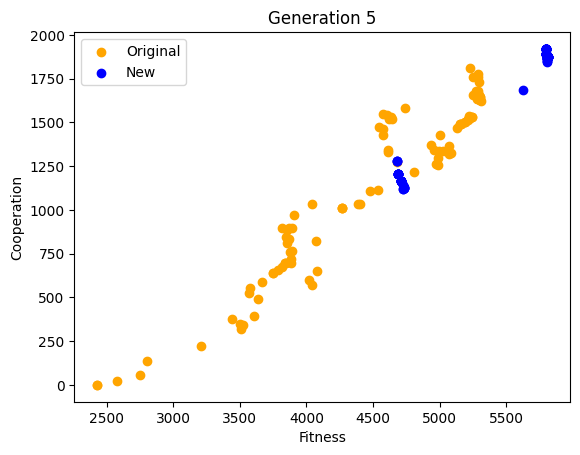

Generation 6
_________________________
100


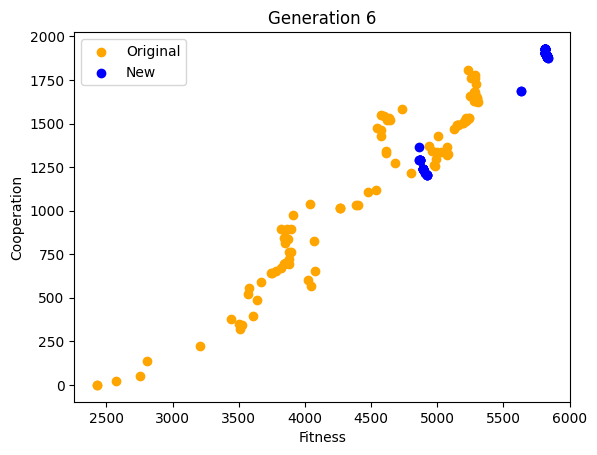

Generation 7
_________________________
100


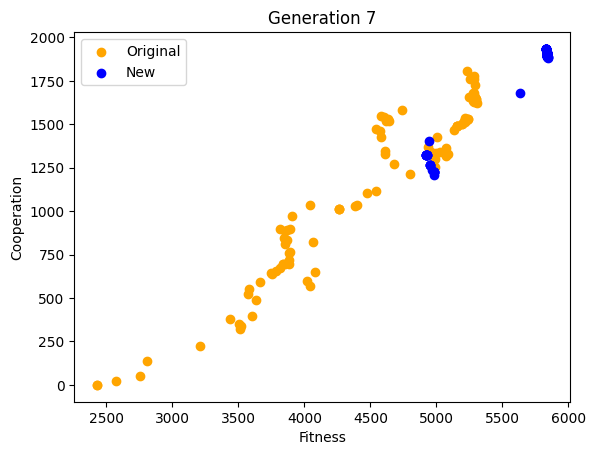

Generation 8
_________________________
100


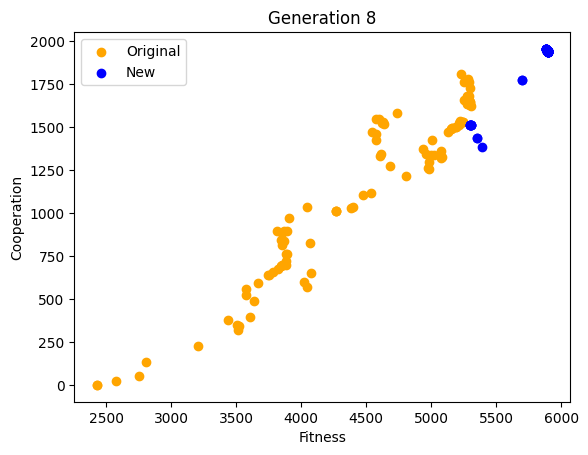

Generation 9
_________________________
100


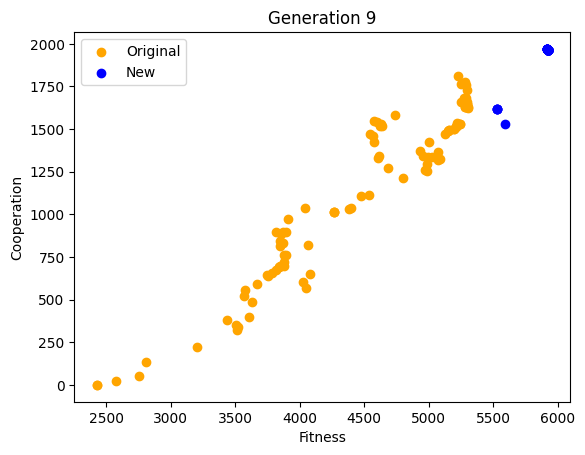

Generation 10
_________________________
100


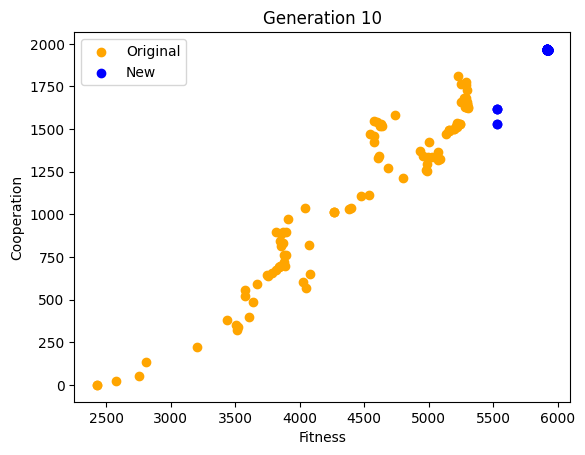

Generation 11
_________________________
100


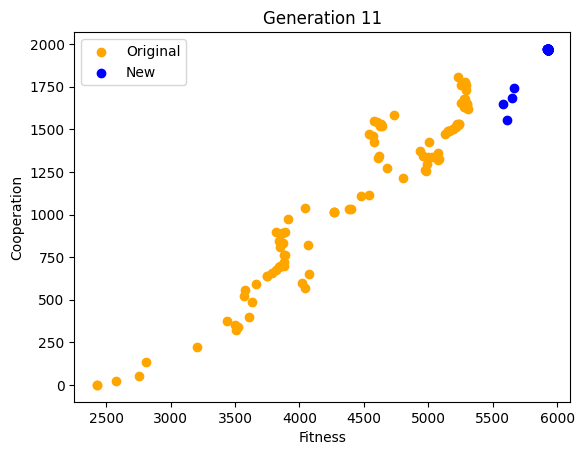

Generation 12
_________________________
100


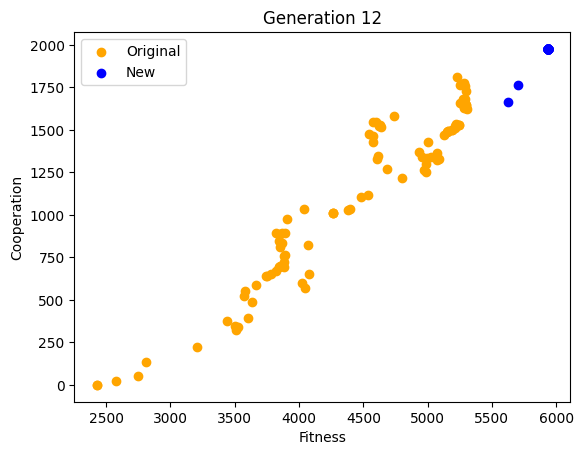

Generation 13
_________________________
100


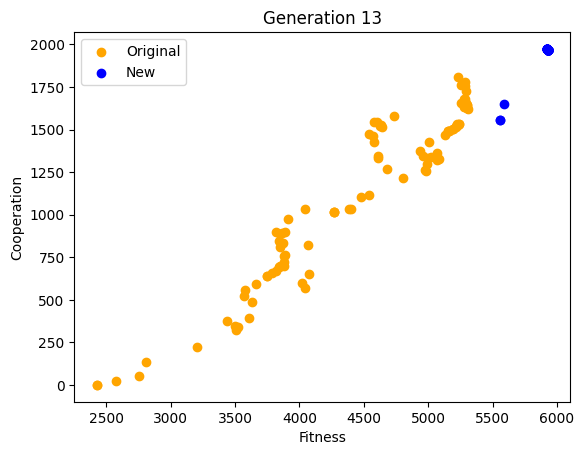

Generation 14
_________________________
100


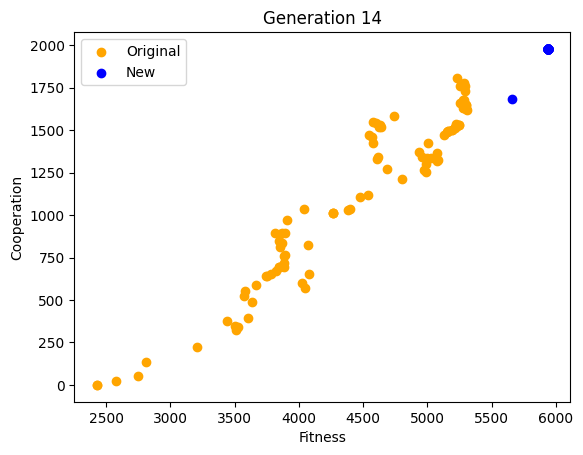

Generation 15
_________________________
100


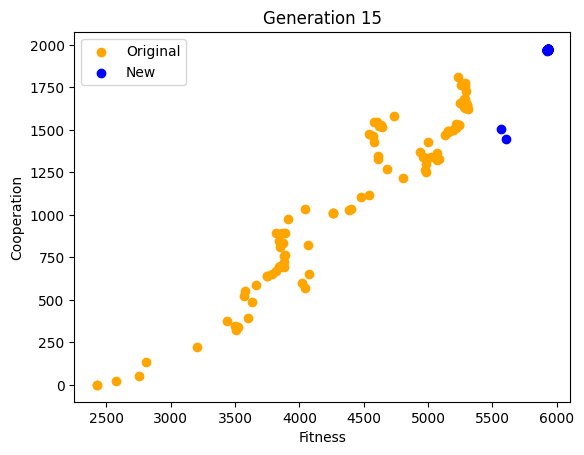

Generation 16
_________________________
100


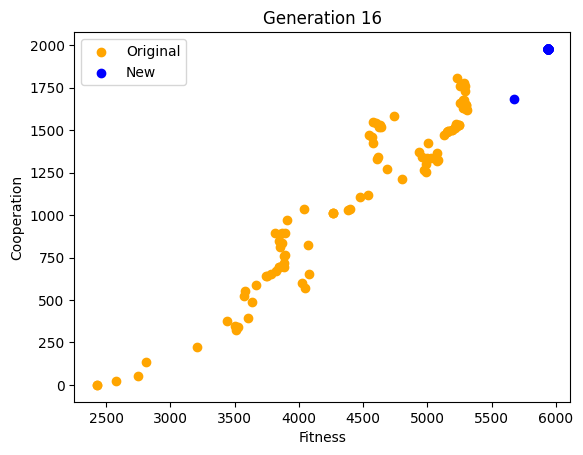

Generation 17
_________________________
100


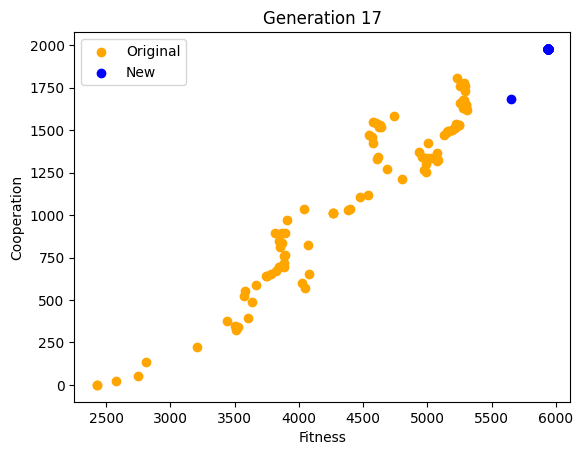

Generation 18
_________________________
100


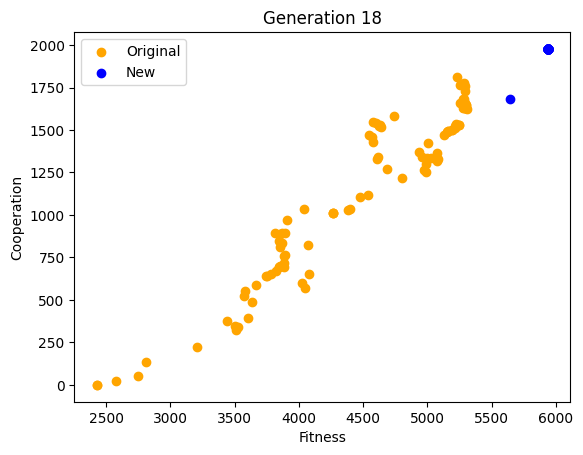

Generation 19
_________________________
100


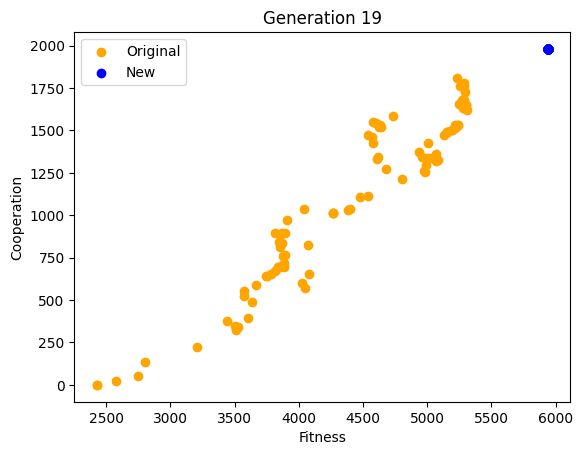






Final Generation
_________________________


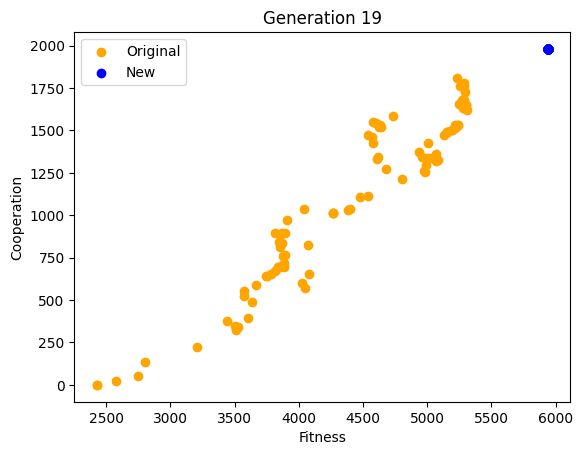

Total Cooperation Attempts 3.546704405396179 | Fitness:  5940 | Trustworthiness:  27283
Bot 0 Algorithms:  [1, 0.557424108334578, 0.49421908877789056, 0.48205581235002326, 0.46091938638608476, 0.5520860095476026]
___________________________-
Total Cooperation Attempts 3.6141598613619674 | Fitness:  5940 | Trustworthiness:  29048
Bot 1 Algorithms:  [1, 0.5698617671619866, 0.5392627675548812, 0.4437814078846942, 0.4038719018972771, 0.6573820168631286]
___________________________-
Total Cooperation Attempts 3.624455081414403 | Fitness:  5940 | Trustworthiness:  29051
Bot 2 Algorithms:  [1, 0.5388813714258172, 0.5099521232600331, 0.4319652261812964, 0.5015207678770806, 0.6421355926701762]
___________________________-
Total Cooperation Attempts 3.428019100183948 | Fitness:  5940 | Trustworthiness:  9882
Bot 3 Algorithms:  [1, 0.5104236917743866, 0.5415977696298125, 0.45207034507829386, 0.3922288199337297, 0.5316984737677257]
___________________________-
Total Cooperation Attempts 3.35331592

In [ ]:
from typing_extensions import final
#New Attempt

import random
import matplotlib.pyplot as plt
import math
import random
import numpy as np
from multiprocessing import Pool

#Settings
# total_matches = 20
# total_generations = 50
# population_size = 100

# cooperate = (3,0)
# defect = (5,1)


class Bibble:
  def __init__(self, dna, fitness, cooperation, trustworthy):
    self.dna = dna
    self.fitness = fitness
    self.cooperation = cooperation
    self.trustworthy = trustworthy
    self.weight = self.precompute_weights()

  #Finds the weights of Bibble for respective clear score
  #ex) total_match = 5   => [f(0),f(1/5),f(2/5),f(3/5),f(4/5),f(5/5)]

  def precompute_weights(self):
    global total_matches
    c = self.dna[5]
    weights = []

    for i in range(total_matches+1):
      weights.append(impression_function(c, i/total_matches))
    return weights

def impression(bot,moves):
  global total_matches
  sample_size = len(moves)
  indices = np.linspace(0, total_matches, sample_size).astype(int)
  weights = [bot.weight[i] for i in indices]
  #Use the dot product to multiply the scores of each and add all up
  score = np.dot(weights,moves)
  impression_score = score / sum(weights)
  return impression_score


def geometric_mean(x):
    return (np.prod(x)+0.0001) ** (1 / len(x))

def impression_function(c,x):
  return 1-(math.tanh(math.pi*c*(1-x)))

def random_dna():
  global total_rounds
  dna = []
  #Initial
  dna.append(random.randint(0,1))
  #Agreeable
  dna.append(random.uniform(0, 1))
  #Forgiveness
  dna.append(random.uniform(0, 1))
  #Apologetic
  dna.append(random.uniform(0, 1))
  #Easy Going
  dna.append(random.uniform(0, 1))
  #Clear/Memory
  dna.append(random.uniform(0, 1))

  return dna



def move(bot,my_moves,opp_moves):

  if my_moves == [] or opp_moves == 0:
    return bot.dna[0]

  agreeable = bot.dna[1]
  forgiving = bot.dna[2]
  apologetic = bot.dna[3]
  easy_going = bot.dna[4]
  immediate = bot.dna[5]

  impression_score = impression(bot,opp_moves)
  my_impression_score = impression(bot,my_moves)

  #Agreeable:
  agreeable_score = geometric_mean([impression_score,agreeable])

  #Forgiving
  forgiving_score = geometric_mean([impression_score,forgiving])

  #Apologetic
  apologetic_score = geometric_mean([1-my_impression_score,apologetic])

  #Easy Going
  #Introduce bias term to remove division by zero
  impression_diff = math.tanh((my_impression_score+0.1) * (impression_score+0.1) / ((my_impression_score+0.1)**2))
  impression_diff = math.tanh((my_impression_score + 0.1) * (impression_score + 0.1) / ((my_impression_score + 0.1) ** 2))

  easy_going_score = geometric_mean([impression_diff,easy_going])

  # Give more weight to metrics depending on case
  if impression_score >= 0.5:
    final_score = (2*agreeable_score + 2*forgiving_score + (1-apologetic_score) + easy_going_score)/6

  else:
    final_score = (agreeable_score + forgiving_score + 2*apologetic_score + 2*easy_going_score)/6

  return round(final_score)


def compete(bot1,bot2):
  global cooperate, defect, total_matches
  bot1_moves = []
  bot2_moves = []


  for i in range(total_matches):
    move_1 = move(bot1, bot1_moves,bot2_moves)
    move_2 = move(bot2, bot2_moves,bot1_moves)
    if move_1 == 1 and move_2 == 1:
      bot1.fitness += cooperate[0]
      bot2.fitness += cooperate[0]
      bot1.cooperation += 1
      bot2.cooperation += 1
      bot1.trustworthy += 1
      bot2.trustworthy += 1

    elif move_1 == 1 and move_2 == 0:
      #Risk Factor for cooperating
      bot1.fitness += cooperate[1]
      bot2.fitness += defect[0]
      bot1.cooperation += 1

    elif move_1== 0 and move_2 == 1:
      bot1.fitness += defect[0]
      bot2.fitness += cooperate[1]
      bot2.cooperation += 1

    elif move_1 == 0 and move_2 == 0:
      bot1.fitness += defect[1]
      bot2.fitness += defect[1]

    bot1_moves.append(move_1)
    bot2_moves.append(move_2)

  return bot1, bot2


def set_random_population(size):
  population = []
  for i in range(size):
    population.append(Bibble(random_dna(),0,0,0))
  return population



def compete_wrapper(args):
    """Wrapper to unpack arguments for `compete`."""
    bot1, bot2 = args
    return compete(bot1, bot2)


def population_war(population):
  for i in range(len(population)):
    for j in range(i+1,len(population)):
      compete(population[i],population[j])
  return population


def generation_results(population,generation):
  global total_generations
  global original_fitness
  global original_cooperation

  rankings = dict()
  for i in range(len(population)):
    rankings[i] = (population[i].fitness, population[i].cooperation)

  rankings = dict(sorted(rankings.items(), key=lambda item: item[1], reverse=True))

  for agent in rankings:
    print("Agent", agent, "| Fitness: ", rankings[agent][0], "| Cooperation: ",rankings[agent][1])

  fitness_val = []
  cooperation_val = []

  for i in rankings:
    fitness_val.append(rankings[i][0])
    cooperation_val.append(rankings[i][1])


  plt.title("Generation " + str(generation))
  plt.xlabel("Fitness")
  plt.ylabel("Cooperation")
  # plt.scatter(original_fitness,original_cooperation)
  plt.scatter(fitness_val,cooperation_val)
  plt.show()
  return rankings


  # for agent in rankings:
  #   print("Agent", agent, "| Fitness: ", rankings[agent][0], "| Cooperation: ",rankings[agent][1])



def generation_results(population):
  global total_generations
  global original_fitness
  global original_cooperation

  rankings = dict()
  for i in range(len(population)):
    rankings[i] = (population[i].fitness, population[i].cooperation)

  rankings = dict(sorted(rankings.items(), key=lambda item: item[1][0], reverse=True))


  # for agent in rankings:
  #   print("Agent", agent, "| Fitness: ", rankings[agent][0], "| Cooperation: ",rankings[agent][1])

  fitness_val = []
  cooperation_val = []

  for i in rankings:
    fitness_val.append(rankings[i][0])
    cooperation_val.append(rankings[i][1])


  plt.title("Generation " + str(generation))
  plt.xlabel("Fitness")
  plt.ylabel("Cooperation")
  plt.scatter(original_fitness, original_cooperation, color='orange', label='Original')
  # Current population (blue)
  plt.scatter(fitness_val, cooperation_val, color='blue', label='New')
  plt.legend()
  plt.show()

  bibble_rankings= list(rankings.keys())
  return rankings


def select_top_10(rankings, population):
  global population_size
  top_10 = []
  #top 10 percent are left
  for i in range(int(population_size*0.1)):
    bibble = population[list(rankings.keys())[i]]
    bibble.fitness = 0
    bibble.cooperation = 0
    top_10.append(bibble)
  return top_10


# def reproduce(bot1, bot2):
#   global total_rounds
#   child_dna = []
#   if bot1.dna[0] == bot2.dna[0]:
#     child_dna.append(bot1.dna[0])
#   else:
#     child_dna.append(random.randint(0,1))

#   for i in range(1,len(bot1.dna)):
#     child_dna.append((bot1.dna[i] + bot2.dna[i])/2)

#   child = Bibble(child_dna,0,0,0)
#   return child


def reproduce(bot1, bot2, mutation_rate=0.3, mutation_strength=0.15):
    """
    Reproduces a child Bibble with a mix of bot1 and bot2 DNA,
    and applies random mutations while ensuring DNA values remain within [0, 1].

    Args:
    - bot1 (Bibble): First parent.
    - bot2 (Bibble): Second parent.
    - mutation_rate (float): Probability of mutation for each gene.
    - mutation_strength (float): Maximum deviation for mutation.

    Returns:
    - Bibble: Child Bibble with mutated DNA.
    """
    child_dna = []

    # Combine DNA from both parents for the first gene (binary decision)
    if bot1.dna[0] == bot2.dna[0]:
        child_dna.append(bot1.dna[0])
    else:
        child_dna.append(random.randint(0, 1))

    # For other genes, mix parent DNA and apply mutation
    for i in range(1, len(bot1.dna)):
        # Average the DNA from both parents
        gene = (bot1.dna[i] + bot2.dna[i]) / 2

        # Apply mutation with a probability of `mutation_rate`
        if random.random() < mutation_rate:
            mutation = random.uniform(-mutation_strength, mutation_strength)
            gene += mutation

        # Ensure the gene value stays within [0, 1]
        gene = max(0, min(1, gene))
        child_dna.append(gene)

    # Create and return the child Bibble
    child = Bibble(child_dna, 0, 0, 0)
    return child


# def freaky_time(rankings,population):
#   global population_size
#   #Generate list of possibiities:
#   new_gen = []
#   new_gen += select_top_10(rankings, population)
#   attraction_weights = [len(rankings) - rank for rank in range(len(rankings))]
#   print(attraction_weights)
#   bibble_rankings= list(rankings.keys())

#   for i in range(int(population_size*0.9)):
#       # Select parents with weights
#       bibble1 = population[random.choices(bibble_rankings, weights=attraction_weights)[-1]]
#       bibble2 = population[random.choices(bibble_rankings, weights=attraction_weights)[-1]]
#       print(bibble1.fitness,bibble2.fitness)
#       # Reproduce and add to the new generation
#       child = reproduce(bibble1, bibble2)
#       new_gen.append(child)

#   return new_gen

def mating_season(rankings,population):
  global population_size
  #Generate list of possibiities:
  new_gen = []
  new_gen += select_top_10(rankings, population)

  bibble_rankings= list(rankings.keys())

  reproduction_list = []
  for i in range(population_size):
    reproduction_list += [bibble_rankings[i]] * (population_size-i+1)

  random.shuffle(reproduction_list)

  for i in range(int(population_size*0.9)):
    bibble1 = bibble_rankings[random.randint(0,len(bibble_rankings)-1)]
    bibble2 = bibble_rankings[random.randint(0,len(bibble_rankings)-1)]
    new_gen.append(reproduce(population[bibble1],population[bibble2]))

  return new_gen


total_matches = 20
total_generations = 20
population_size = 100


cooperate = (3,0)
defect = (5,1)


population = set_random_population(population_size)

for generation in range(total_generations):
  print("Generation", generation)
  print("_________________________")

  population = population_war(population)
  print(len(population))
  if generation == 0:
    original_fitness = [agent.fitness for agent in population]
    original_cooperation = [agent.cooperation for agent in population]

  rankings = generation_results(population)
  new_gen = mating_season(rankings,population)
  population = new_gen

print("\n\n\n\n")

print("Final Generation")
print("_________________________")
population = population_war(population)
rankings = generation_results(population)

for i in rankings:
  print("Total Cooperation Attempts", sum(population[i].dna), "| Fitness: ", population[i].fitness, "| Trustworthiness: ", population[i].trustworthy)
  print("Bot", i , "Algorithms: ",population[i].dna)
  print("___________________________-")

print("Population Size : ", len(population))

In [ ]:
population[1].dna

[1,
 0.4241719529005218,
 0.6115226152791758,
 0.5551926295355989,
 0.43232445167560357,
 0.6328320406090909]

In [ ]:
bot1 = Bibble([1, 0.5539498863368089, 0.526740415747385, 0.519242762369275, 0.49166190453894004, 0.3992700245965972],0,0,0)
bot2 = Bibble([1, 0.4559458439083025, 0.4337638641461212, 0.6186738641333133, 0.5462785587305575, 0.4693430701456512],0,0,0)
total_matches = 10
# compete_show(bot1,bot2)
# print(bot1.fitness)
# print(bot2.fitness)

player_compete(bot1)



Enter 1 to cooperate, 0 to defect: 1
[1]
[1]




Impression Score  1.0
My Impression Score 1.0
Agreeable: 0.7443452736041312
Forgiving: 0.7258377337583001
Apologetic: 0.01
Easy-Going: 0.6120023147039052
Good Impression:  0.5937280549047945

Enter 1 to cooperate, 0 to defect: 0
[1, 1]
[1, 0]




Impression Score  0.13081479040765248
My Impression Score 1.0
Agreeable: 0.2693786151079788
Forgiving: 0.262688859842274
Apologetic: 0.01
Easy-Going: 0.31902712171267034
Bad Impression:  0.19835361972926557

Enter 1 to cooperate, 0 to defect: 0
[1, 1, 0]
[1, 0, 0]




Impression Score  0.0943945587460896
My Impression Score 0.3728052151257549
Agreeable: 0.22888830264609322
Forgiving: 0.22320714396767455
Apologetic: 0.5707594525206798
Easy-Going: 0.4376958993852203
Bad Impression:  0.41150102507092795

Enter 1 to cooperate, 0 to defect: 1
[1, 1, 0, 0]
[1, 0, 0, 1]




Impression Score  0.5805975670950966
My Impression Score 0.2246013432156604
Agreeable: 0.5672053916349495
Forgiving: 0.5531041528

(<__main__.Bibble at 0x7e02fc6764a0>, <__main__.Bibble at 0x7e02fc6776a0>)

In [ ]:
def move_show(bot,my_moves,opp_moves):

  if my_moves == []:
    return bot.dna[0]

  agreeable = bot.dna[1]
  forgiving = bot.dna[2]
  apologetic = bot.dna[3]
  easy_going = bot.dna[4]
  immediate = bot.dna[5]

  impression_score = impression(bot,opp_moves)
  my_impression_score = impression(bot,my_moves)

  print("Impression Score ",impression_score)
  print("My Impression Score",my_impression_score)

  #Agreeable:
  agreeable_score = geometric_mean([impression_score,agreeable])
  print("Agreeable:",agreeable_score)

  #Forgiving
  forgiving_score = geometric_mean([impression_score,forgiving])
  print("Forgiving:",forgiving_score)


  #Apologetic
  apologetic_score = geometric_mean([1-my_impression_score,apologetic])
  print("Apologetic:",apologetic_score)

  #Easy Going
  #Introduce bias term to remove division by zero
  impression_diff = math.tanh((my_impression_score+0.1) * (impression_score+0.1) / ((my_impression_score+0.1)**2))
  easy_going_score = geometric_mean([impression_diff,easy_going])
  print("Easy-Going:",easy_going_score)

  # Give more weight to metrics depending on case
  if impression_score >= 0.5:
    final_score = (2*agreeable_score + 2*forgiving_score + apologetic_score + easy_going_score)/6
    print("Good Impression: ", final_score)

  else:
    final_score = (agreeable_score + forgiving_score + 2*apologetic_score + 2*easy_going_score)/6
    print("Bad Impression: ", final_score)

  return round(final_score)


def compete_show(bot1,bot2):
  global cooperate, defect
  bot1_moves = []
  bot2_moves = []


  for i in range(total_rounds):
    move_1 = move_show(bot1, bot1_moves,bot2_moves)
    print()
    move_2 = move_show(bot2, bot2_moves,bot1_moves)
    if move_1 == 1 and move_2 == 1:
      bot1.fitness += cooperate[0]
      bot2.fitness += cooperate[0]
      bot1.cooperation += 1
      bot2.cooperation += 1
      bot1.trustworthy += 1
      bot2.trustworthy += 1

    elif move_1 == 1 and move_2 == 0:
      #Risk Factor for cooperating
      bot1.fitness += cooperate[1]
      bot2.fitness += defect[0]
      bot1.cooperation += 1

    elif move_1== 0 and move_2 == 1:
      bot1.fitness += defect[0]
      bot2.fitness += cooperate[1]
      bot2.cooperation += 1

    elif move_1 == 0 and move_2 == 0:
      bot1.fitness += defect[1]
      bot2.fitness += defect[1]

    bot1_moves.append(move_1)
    bot2_moves.append(move_2)
    print(bot1_moves)
    print(bot2_moves)
    print("\n\n")
  return bot1, bot2

def player_compete(bot1):
  global cooperate, defect
  bot1_moves = []
  player_moves = []
  player_fitness = 0
  player_trustworthiness = 0
  player_cooperation = 0

  for i in range(total_rounds):
    move_1 = move_show(bot1, bot1_moves,player_moves)
    print()
    move_2 = int(input("Enter 1 to cooperate, 0 to defect: "))
    if move_1 == 1 and move_2 == 1:
      bot1.fitness += cooperate[0]
      player_fitness += cooperate[0]
      bot1.cooperation += 1
      bot2.cooperation += 1
      bot1.trustworthy += 1
      bot2.trustworthy += 1

    elif move_1 == 1 and move_2 == 0:
      #Risk Factor for cooperating
      bot1.fitness += cooperate[1]
      player_fitness += defect[0]
      bot1.cooperation += 1

    elif move_1== 0 and move_2 == 1:
      bot1.fitness += defect[0]
      player_fitness += cooperate[1]
      bot2.cooperation += 1

    elif move_1 == 0 and move_2 == 0:
      bot1.fitness += defect[1]
      player_fitness += defect[1]

    bot1_moves.append(move_1)
    player_moves.append(move_2)
    print(bot1_moves)
    print(player_moves)
    print("\n\n")
    print()
  return bot1, bot2

In [ ]:
import numpy as np

array = np.arange(1, 21)  # Example array of 20 elements
n_samples = 11

# Generate evenly spaced indices and round to integers

indices = np.linspace(0, total_matches, n_samples).astype(int)

print("Sampled elements:", indices)



Sampled elements: [ 0  2  4  6  8 10 12 14 16 18 20]


In [ ]:
moves = [1,0,0,0,0,0,0,0,0,0]
miguel = Bibble(random_dna(),0,0,0)


sample_size = len(moves)
weights = []
for i in range(sample_size):
  weights.append(miguel.weight[int(i*total_matches/sample_size)])

print(miguel.weight[0::int(total_matches/sample_size)])

[0.06481539479095177, 0.08985189385559411, 0.12393995935880842, 0.16981069959172856, 0.23057190175498377, 0.3093990607823688, 0.4089469462729939, 0.5304739126115046, 0.6728427096427794, 0.8317931342992629]
[0.06481539479095177, 0.08985189385559411, 0.12393995935880842, 0.16981069959172856, 0.23057190175498377, 0.3093990607823688, 0.4089469462729939, 0.5304739126115046, 0.6728427096427794, 0.8317931342992629]


In [ ]:
total_rounds = 20
miguel = Bibble(random_dna(),0,0,0)
random_girl = Bibble(random_dna(),0,0,0)

random_child = reproduce(miguel,random_girl)
print(miguel.dna)
print(random_girl.dna)
print(random_child.dna)

compete(miguel,random_child)
print("Miguel Score",miguel.fitness)
print("Hopecore Child", random_child.fitness)

#How does the DNA work?
#Each metric is put into a list
# Initial/ Forgiveness / Apologetic / Retaliatory/ Belief/ Grudge/
#Initial: Start as Defect --> 0/ Cooperate --> 1
#Agreeable: (0-1) Probability to cooperate after (W/W) [Belief included] (0: Nasty, 100: Nice)
#Forgiveness: (0-1) Probability to cooperate after betrayals(L/W) [Grudge and Belief included] (0:Always Retaliate, 100: Always Forgive)
#Apologetic: (0-1) Probability to cooperate after betraying (W/L) [Grudge and Belief Included] (0:Never Apologize, 100: Always Apologize)
#Easygoing: (0-1) Probability to cooperate after (L/L)


#Clear: (0-1) How much emphasis do you put on near events  (0: All equal(overthinker) / 100: All on events right before)

[0, 0.6810217630328131, 0.5622920201714049, 0.6422810612021322, 0.13461057835627277, 0.48050234276694304]
[0, 0.2932302509260871, 0.9171699831916198, 0.06972097433970015, 0.41747580785811356, 0.1670349276423191]
[0, 0.48712600697945013, 0.7397310016815124, 0.3560010177709162, 0.27604319310719316, 0.32376863520463106]

[0]
[0]



Impression Score  0.0
My Impression Score 0.0
Agreeable: 0.0
Forgiving: 0.0
Apologetic: 0.8014243951878007
Easy-Going: 0.3201853054185387
Bad Impression:  0.37386990020211314

Impression Score  0.0
My Impression Score 0.0
Agreeable: 0.0
Forgiving: 0.0
Apologetic: 0.5966582085004078
Easy-Going: 0.4585115949044331
Bad Impression:  0.3517232678016136
[0, 0]
[0, 0]



Impression Score  0.0
My Impression Score 0.0
Agreeable: 0.0
Forgiving: 0.0
Apologetic: 0.8014243951878007
Easy-Going: 0.3201853054185387
Bad Impression:  0.37386990020211314

Impression Score  0.0
My Impression Score 0.0
Agreeable: 0.0
Forgiving: 0.0
Apologetic: 0.5966582085004078
Easy-Going: 0.45851

# Individual Competition

In [ ]:


from typing_extensions import final
#New Attempt

import random
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import concurrent.futures

#Settings
total_matches = 20
total_generations = 50
population_size = 100


class Bibble:
  def __init__(self, dna, fitness, cooperation, trustworthy):
    self.dna = dna
    self.fitness = fitness
    self.cooperation = cooperation
    self.trustworthy = trustworthy
    self.weight = self.precompute_weights()

  #Finds the weights of Bibble for respective clear score
  #ex) total_match = 5   => [f(0),f(1/5),f(2/5),f(3/5),f(4/5),f(5/5)]

  def precompute_weights(self):
    global total_matches
    c = self.dna[5]
    weights = []

    for i in range(total_matches+1):
      weights.append(impression_function(c, i/total_matches))
    return weights

def impression(bot,moves):
  global total_matches
  sample_size = len(moves)
  indices = np.linspace(0, total_matches, sample_size).astype(int)
  weights = [bot.weight[i] for i in indices]
  #Use the dot product to multiply the scores of each and add all up
  score = np.dot(weights,moves)
  impression_score = score / sum(weights)
  return impression_score




def geometric_mean(x):
    return np.prod(x) ** (1 / len(x))

def impression_function(c,x):
  return 1-(math.tanh(math.pi*c*(1-x)))

def random_dna():
  global total_rounds
  dna = []
  #Initial
  dna.append(random.randint(0,1))
  #Agreeable
  dna.append(random.uniform(0, 1))
  #Forgiveness
  dna.append(random.uniform(0, 1))
  #Apologetic
  dna.append(random.uniform(0, 1))
  #Easy Going
  dna.append(random.uniform(0, 1))
  #Clear/Memory
  dna.append(random.uniform(0, 1))

  return dna



def move(bot,my_moves,opp_moves):

  if my_moves == []:
    return bot.dna[0]

  agreeable = bot.dna[1]
  forgiving = bot.dna[2]
  apologetic = bot.dna[3]
  easy_going = bot.dna[4]
  immediate = bot.dna[5]

  impression_score = impression(bot,opp_moves)
  my_impression_score = impression(bot,my_moves)


  print("Impression Score ",impression_score)
  print("My Impression Score",my_impression_score)

  #Agreeable:
  agreeable_score = geometric_mean([impression_score,agreeable])
  print("Agreeable:",agreeable_score)

  #Forgiving
  forgiving_score = geometric_mean([impression_score,forgiving])
  print("Forgiving:",forgiving_score)


  #Apologetic
  apologetic_score = geometric_mean([1-my_impression_score,apologetic])
  print("Apologetic:",apologetic_score)

  #Easy Going
  #Introduce bias term to remove division by zero
  impression_diff = math.tanh((my_impression_score+0.1) * (impression_score+0.1) / ((my_impression_score+0.1)**2))
  easy_going_score = geometric_mean([impression_diff,easy_going])
  print("Easy-Going:",easy_going_score)

  # Give more weight to metrics depending on case
  if impression_score >= 0.5:
    final_score = (2*agreeable_score + 2*forgiving_score + apologetic_score + easy_going_score)/6
    print("Good Impression: ", final_score)

  else:
    final_score = (agreeable_score + forgiving_score + 2*apologetic_score + 2*easy_going_score)/6
    print("Bad Impression: ", final_score)

  return round(final_score)


def compete(bot1,bot2):
  global cooperate, defect
  bot1_moves = []
  bot2_moves = []


  for i in range(total_rounds):
    move_1 = move(bot1, bot1_moves,bot2_moves)
    print()
    move_2 = move(bot2, bot2_moves,bot1_moves)
    if move_1 == 1 and move_2 == 1:
      bot1.fitness += cooperate[0]
      bot2.fitness += cooperate[0]
      bot1.cooperation += 1
      bot2.cooperation += 1
      bot1.trustworthy += 1
      bot2.trustworthy += 1

    elif move_1 == 1 and move_2 == 0:
      #Risk Factor for cooperating
      bot1.fitness += cooperate[1]
      bot2.fitness += defect[0]
      bot1.cooperation += 1

    elif move_1== 0 and move_2 == 1:
      bot1.fitness += defect[0]
      bot2.fitness += cooperate[1]
      bot2.cooperation += 1

    elif move_1 == 0 and move_2 == 0:
      bot1.fitness += defect[1]
      bot2.fitness += defect[1]

    bot1_moves.append(move_1)
    bot2_moves.append(move_2)
    print(bot1_moves)
    print(bot2_moves)
    print("\n\n")
  return bot1, bot2



# miguel_moves =     [0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1]
# snow_bunny_moves = [1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1]

miguel = Bibble([1, 0.004421328701058713, 0.754228176065567, 0.5911364829366631, 0.7067605171741203, 0.7250246994994949],0,0,0)
snow_bunny = Bibble([1, 0.6383784975673803, 0.19999104463572503, 0.8245287677368405, 0.21142583209134203, 0.04847237123758397],0,0,0)

initial = miguel.dna[0]
agreeable = miguel.dna[1]
forgiving = miguel.dna[2]
apologetic = miguel.dna[3]
easy_going = miguel.dna[4]
clear = miguel.dna[5]


total_rounds


print("Miguel? ;)", miguel.dna)
print("Snow Bunny Time :)", snow_bunny.dna)
print()

compete(miguel,snow_bunny)

print(miguel.fitness)
print(snow_bunny.fitness)

  # agreeable = bot.dna[1]
  # forgiving = bot.dna[2]
  # apologetic = bot.dna[3]
  # easy_going = bot.dna[4]
  # immediate = bot.dna[5]


Miguel? ;) [1, 0.004421328701058713, 0.754228176065567, 0.5911364829366631, 0.7067605171741203, 0.7250246994994949]
Snow Bunny Time :) [1, 0.6383784975673803, 0.19999104463572503, 0.8245287677368405, 0.21142583209134203, 0.04847237123758397]


[1]
[1]



Impression Score  1.0
My Impression Score 1.0
Agreeable: 0.06649307257947036
Forgiving: 0.868463111516872
Apologetic: 0.0
Easy-Going: 0.7336652366986485
Good Impression:  0.4339296008152222

Impression Score  1.0
My Impression Score 1.0
Agreeable: 0.7989859182534949
Forgiving: 0.4472035829862335
Apologetic: 0.0
Easy-Going: 0.40127381940372203
Good Impression:  0.48227547031386314
[1, 0]
[1, 0]



Impression Score  0.02037677755554355
My Impression Score 0.02037677755554355
Agreeable: 0.009491703295057937
Forgiving: 0.12397072142167842
Apologetic: 0.7609803061307804
Easy-Going: 0.7336652366986485
Bad Impression:  0.5204589183959324

Impression Score  0.4591337210688993
My Impression Score 0.4591337210688993
Agreeable: 0.5413881186713323

In [ ]:
def move(bot,my_moves,opp_moves):

  if my_moves == []:
    return bot.dna[0]

  agreeable = bot.dna[1]
  forgiving = bot.dna[2]
  apologetic = bot.dna[3]
  easy_going = bot.dna[4]
  immediate = bot.dna[5]

  impression_score = impression(bot,opp_moves)
  my_impression_score = impression(bot,my_moves)


  print("Impression Score ",impression_score)
  print("My Impression Score",my_impression_score)

  #Agreeable:
  agreeable_score = geometric_mean([impression_score,agreeable])
  print("Agreeable:",agreeable_score)

  #Forgiving
  forgiving_score = geometric_mean([impression_score,forgiving])
  print("Forgiving:",forgiving_score)


  #Apologetic
  apologetic_score = geometric_mean([my_impression_score,apologetic])
  print("Apologetic:",apologetic_score)

  #Easy Going
  #Introduce bias term to remove division by zero
  impression_diff = math.tanh((my_impression_score+0.1) * (impression_score+0.1) / ((my_impression_score+0.1)**2))
  easy_going_score = geometric_mean([impression_diff,easy_going])
  print("Easy-Going:",easy_going_score)

  #Give more weight to metrics depending on case
  if impression_score >= 0.5:
    final_score = int((impression_score + 2*agreeable_score + 2*forgiving_score + apologetic_score + easy_going_score)/7 * 1000)

  else:
    final_score = int((impression_score + agreeable_score + forgiving_score + 2*apologetic_score + 2*easy_going_score)/7 * 1000)

  return random.choices([0, 1], weights=[1-final_score, final_score])[0]


In [ ]:
class Bibble:
  def __init__(self, dna, fitness, cooperation, trustworthy):
    self.dna = dna
    self.fitness = fitness
    self.cooperation = cooperation
    self.trustworthy = trustworthy
    self.weight = self.precompute_weights()


  def precompute_weights(self):
    global total_matches
    c = self.dna[5]
    weights = []

    for i in range(total_matches+1):
      weights.append(impression_function(c, i/total_matches))
    return weights


#This is the weight for the Bibble as the match goes on.
Miguel = Bibble(random_dna(),0,0,0)
matches = Miguel.weight
print(matches)
sample_size = 3
for i in range(sample_size + 1):
  print(matches[int(i*total_matches/sample_size)])

#Now all we have to do is sample from this batch! This reduces our space and time complexity to O(n)

[0.010801871362852933, 0.013997795273494984, 0.018130671106659335, 0.023469366387666724, 0.030355997282639935, 0.03922327584316043, 0.05061421052847159, 0.0652032106817676, 0.08381652773168968, 0.10744823703305506, 0.13726551220152494, 0.1745938496980315, 0.22086969930274702, 0.2775459974971948, 0.3459378694606219, 0.42700470731580586, 0.5210839654281838, 0.6276207434132716, 0.7449672219040946, 0.8703398362709108, 1.0]
0.010801871362852933
0.05061421052847159
0.2775459974971948
1.0


Agent 3 | Fitness:  1060 | Trustworthy:  760
Agent 6 | Fitness:  1060 | Trustworthy:  760
Agent 10 | Fitness:  1060 | Trustworthy:  760
Agent 13 | Fitness:  1060 | Trustworthy:  760
Agent 14 | Fitness:  1060 | Trustworthy:  760
Agent 15 | Fitness:  1060 | Trustworthy:  760
Agent 16 | Fitness:  1060 | Trustworthy:  760
Agent 19 | Fitness:  1060 | Trustworthy:  760
Agent 21 | Fitness:  1060 | Trustworthy:  760
Agent 24 | Fitness:  1060 | Trustworthy:  760
Agent 26 | Fitness:  1060 | Trustworthy:  760
Agent 30 | Fitness:  1060 | Trustworthy:  760
Agent 31 | Fitness:  1060 | Trustworthy:  760
Agent 34 | Fitness:  1060 | Trustworthy:  760
Agent 41 | Fitness:  1060 | Trustworthy:  760
Agent 42 | Fitness:  1060 | Trustworthy:  760
Agent 44 | Fitness:  1060 | Trustworthy:  760
Agent 45 | Fitness:  1060 | Trustworthy:  760
Agent 56 | Fitness:  1060 | Trustworthy:  760
Agent 57 | Fitness:  1060 | Trustworthy:  760
Agent 58 | Fitness:  1060 | Trustworthy:  760
Agent 62 | Fitness:  1060 | Trustwor

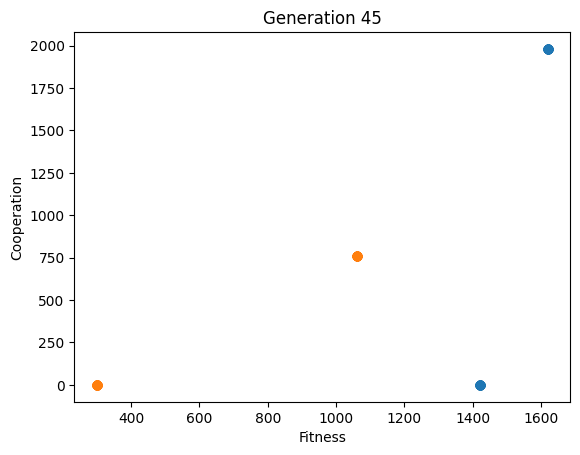

Total Cooperation Attempts 3.3668140366515042 | Fitness:  760
Bot 3 Algorithms:  [1, 0.6769886923494778, 0.5355344135935489, 0.26741140721008116, 0.6618093031452952, 0.2250702203531011]
___________________________
Total Cooperation Attempts 3.9676314081908393 | Fitness:  760
Bot 6 Algorithms:  [1, 0.968156586703271, 0.2756494034637955, 0.6583665905930443, 0.4549403741406578, 0.6105184532900707]
___________________________
Total Cooperation Attempts 2.590070550101907 | Fitness:  760
Bot 10 Algorithms:  [1, 0.17946400399612017, 0.2896712368568425, 0.7653618718942493, 0.32798137632320257, 0.0275920610314927]
___________________________
Total Cooperation Attempts 3.417906575527059 | Fitness:  760
Bot 13 Algorithms:  [1, 0.25066035573655465, 0.5381235685616022, 0.6399409968950439, 0.6416732626073642, 0.3475083917264937]
___________________________
Total Cooperation Attempts 4.961482716454602 | Fitness:  760
Bot 14 Algorithms:  [1, 0.985442713856461, 0.8198327505083873, 0.9430972861332791, 0

In [ ]:
def generation_results(population):
  global total_generations
  global original_fitness
  global original_cooperation

  rankings = dict()
  for i in range(len(population)):
    rankings[i] = (population[i].fitness, population[i].trustworthy)

  rankings = dict(sorted(rankings.items(), key=lambda item: item[1], reverse=True))

  for agent in rankings:
    print("Agent", agent, "| Fitness: ", rankings[agent][0], "| Trustworthy: ",rankings[agent][1])

  fitness_val = []
  cooperation_val = []

  for i in rankings:
    fitness_val.append(rankings[i][0])
    cooperation_val.append(rankings[i][1])


  plt.title("Generation " + str(generation+1))
  plt.xlabel("Fitness")
  plt.ylabel("Cooperation")
  plt.scatter(original_fitness,original_cooperation)
  plt.scatter(fitness_val,cooperation_val)
  plt.show()
  return rankings


def select_top_10(rankings, population):
  global population_size
  top_10 = []
  #top 10 percent are left
  for i in range(int(population_size*0.1)):
    bibble = population[list(rankings.keys())[i]]
    bibble.fitness = 0
    bibble.cooperation = 0
    top_10.append(bibble)
  return top_10


population = set_random_population(100)
population = population_war(population)
rankings = generation_results(population)

for i in rankings:
  print("Total Cooperation Attempts", sum(population[i].dna), "| Fitness: ", population[i].trustworthy)
  print("Bot", i , "Algorithms: ",population[i].dna)
  print("___________________________")


In [ ]:
def compete(bot1):
  bot1_moves = []
  bot2_moves = []

  move_1 = move(bot1, bot1_moves,bot2_moves)
  move_2 = int(input("Player Move: "))
  for i in range(total_rounds):

    if move_1 == 1 and move_2 == 1:
      bot1.fitness += cooperate[0]
      bot2.fitness += cooperate[0]
      bot1.cooperation += 1
      bot2.cooperation += 1
      bot1.trustworthy += 1
      bot2.trustworthy += 1

    elif move_1 == 1 and move_2 == 0:
      #Risk Factor for cooperating
      bot1.fitness += cooperate[1]
      bot2.fitness += defect[0]
      bot1.cooperation += 1

    elif move_1== 0 and move_2 == 1:
      bot1.fitness += defect[0]
      bot2.fitness += cooperate[1]
      bot2.cooperation += 1

    elif move_1 == 0 and move_2 == 0:
      bot1.fitness += defect[1]
      bot2.fitness += defect[1]

    bot1_moves.append(move_1)
    bot2_moves.append(move_2)

  print(bot1_moves)
  print(bot2_moves)
  return bot1, bot2


Pixie = Bibble([1, 0.35879608058317847, 0.5715000319235272, 0.9079901392092281, 0.622071522698272, 0.6753585611054489],0,0,0)
Quack = Bibble([1, 0.7458852774860133, 0.6176870120141457, 0.004304842013405308, 0.7617314190865035, 0.34613932588843843],0,0,0)

compete(Pixie,Quack)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


(<__main__.Bibble at 0x7eb7a29ab040>, <__main__.Bibble at 0x7eb7a29a9ea0>)

# How does the DNA work?
Each metric is put into a list

Initial/ Forgiveness / Apologetic / Retaliatory/ Belief/ Grudge/

Initial: Start as Defect --> 0/ Cooperate --> 1

Agreeable: (0-1) Probability to cooperate after (W/W) [Belief included] (0: Nasty, 100: Nice)

Forgiveness: (0-1) Probability to cooperate after betrayals(L/W) [Grudge and Belief included] (0:Always Retaliate, 100: Always Forgive)

Apologetic: (0-1) Probability to cooperate after betraying (W/L) [Grudge and Belief Included] (0:Never Apologize, 100: Always Apologize)

Easy-Going: (0-1) Probability to cooperate after (L/L)


Belief: (0-whole_game) How many previous matches to believe the other partner for

Grudge: (0-whole_game) How long to hold grudges

Clear: (0-1) How much emphasis do you put on near events (Memory/Heuristic) (0: All equal(overthinker) / 100: All on events right before)

In [ ]:
#Returns a value between 0-1



def geometric_mean(x):
  prod = 1
  for i in range(len(x)):
    prod *= x[i]
  return prod**(1/len(x))


def impression_function(c,x):
  return 1-(math.tanh(math.pi*c*(1-x)))

#c: clear / moves : list of moves
def impression_score(c,moves):
  t = len(moves)

  weight = []
  score = 0
  for i in range(t*10):
    #Returns list of samples for each moment
    weight.append(int(100*impression_function(c,i/t)))
    #Score represents how much of those were cooperation
    score += weight[i] * moves[i//10]

  #Number of zeros
  defect_count = sum(weight)-score
  cooperation_count = score

  impression_score = score/sum(weight)
  return impression_score

def move(self,my_moves,opp_moves):

  impression_score = impression(self.immediate,(opp_moves))
  my_impression_score = impression(self.immediate,my_moves)

  print("Impression Score ",impression_score)
  print("My Impression Score",my_impression_score)

  #Agreeable:
  agreeable_score = geometric_mean([impression_score,self.agreeable])
  print("Agreeable:",agreeable)

  #Forgiving
  forgiving_score = geometric_mean([impression_score,self.forgiving])
  print("Forgiving:",forgiving)


  #Apologetic
  apologetic_score = geometric_mean([my_impression_score,self.apologetic])
  print("Apologetic:",apologetic)

  #Easy Going
  easy_going_score = geometric_mean([impression_score,easy_going])
  print("Easy-Going:",easy_going)


  final_score = int((impression_score + agreeable + forgiving + apologetic + easy_going)/4 * 1000)
  probabilities = [1] * final_score + [0] * (1000-final_score)
  random.shuffle(probabilities)
  return probabilities[random.randint(0,999)]



Impression Score  0.672957396315968
Agreeable: 0.7337342278051191
Forgiving: 0.2594142240348374
Apologetic: 0.36686711390255955
Easy-Going: 0.2594142240348374
[1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 

In [ ]:
#